# Library and Data Setup

In [ ]:
# Packages Library

import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import warnings
import sklearn
warnings.filterwarnings('ignore')
from datetime import datetime as dt
import regex as re

In [ ]:
# Plot Setup

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Table Display Setup: Show All Columns

pd.set_option('display.max_columns', None)

## Dataset

1. 'df' for employees' general data
2. 'df_employee_survey' for employees' survey data for the office
3. 'df_manager_survey' for managers' survey data foe the employees
4. 'df_in_time' containing the data of the time the employees arrived at the office
5. 'df_out_time' containing the data of the time they left the office
6. 'df_working_hours' containing number of hours the employees spent at the office (u can get automatically by the mounting, or extract it manually by the process)

In [ ]:
# Data Mounting

# df
df = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/general_data.csv')
# df_employee_survey
df_employee_survey = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/employee_survey_data.csv')
# df_manager_survey
df_manager_survey = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/manager_survey_data.csv')
# df_in_time
df_in_time = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/in_time.csv')
# df_out_time
df_out_time = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/out_time.csv')
# df_working_hours
# df_working_hours = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/df_working_hours.csv')

# EDA

Exploratory Data Analysis

## df

In [ ]:
# Getting Features' Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   EmployeeID               4410 non-null   int64   
 8   Gender                   4410 non-null   category
 9   JobLevel                 4410 non-null   int64   
 10  JobRole                  4410 non-null   category
 11  MaritalStatus            4410 non-null   category
 12  MonthlyIncome            4410 non-null   int64   
 13  NumCompaniesWorked       4391 non-null   float64 
 14  PercentS

In [ ]:
# Data Preview
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3


### Features Grouping

In [ ]:
# Numeric Type Data
num_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager']

# Categoric or Non-Numeric Type Data
cat_columns = df.columns[~df.columns.isin(num_columns) & ~df.columns.isin(['EmployeeID'])]

# Categoric Data with Single Value
single_value_columns = []

for column_name in cat_columns:
  if df[column_name].nunique() == 1:
    single_value_columns.append(column_name)

# Ordinal Categoric Data
# Some data are already in numeric values, means its ordered values.
num_type = ['int64', 'float64']
ordinal_cat_columns = []

for column_name in cat_columns:
  if column_name not in single_value_columns:
    if df[column_name].dtype in num_type:
      ordinal_cat_columns.append(column_name)

cat_columns = cat_columns[(~cat_columns.isin(ordinal_cat_columns))]

# Nominal Categoric Data with >2 Unique Values
ohe_columns = []

for column_name in cat_columns:
  if df[column_name].nunique() > 2:
    ohe_columns.append(column_name)

# Nominal Categoric Data with 2 Unique Values
binary_columns = cat_columns[(~cat_columns.isin(ohe_columns)) & (~cat_columns.isin(single_value_columns))]

In [ ]:
print(f'numeric_columns: {num_columns}')
print(f'cat_columns: {cat_columns}')
print(f'single_value_columns: {single_value_columns}')
print(f'ordinal_cat_columns: {ordinal_cat_columns}')
print(f'ohe_columns: {ohe_columns}')
print(f'binary_columns: {binary_columns}')

numeric_columns: ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cat_columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus'],
      dtype='object')
single_value_columns: []
ordinal_cat_columns: ['Education', 'JobLevel', 'StockOptionLevel']
ohe_columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
binary_columns: Index(['Attrition', 'Gender'], dtype='object')


In [ ]:
# Show Each Categoric Features' Values
for column_name in cat_columns:
  print(f'{column_name}: {df[column_name].unique()}')

Attrition: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
BusinessTravel: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department: ['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']
EducationField: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
                         'Technical Degree']
Gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
JobRole: ['Healthcare Representative', 'Research Scientist', 'Sales Executive', 'Human Resources', 'Research Director', 'Laboratory Technician', 'Manufacturing Director', 'Sales Representative', 'Manager']
Categories (9, object): ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', ...,
          

### df: Features Cleansing and Conversion

Deleting features with single value

In [ ]:
# To-Categoric Conversion
df[cat_columns] = df[cat_columns].astype('category')
df.drop(columns=single_value_columns, inplace=True)

# Drop Features with Single Value
cat_columns = cat_columns.drop(single_value_columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   EmployeeID               4410 non-null   int64   
 8   Gender                   4410 non-null   category
 9   JobLevel                 4410 non-null   int64   
 10  JobRole                  4410 non-null   category
 11  MaritalStatus            4410 non-null   category
 12  MonthlyIncome            4410 non-null   int64   
 13  NumCompaniesWorked       4391 non-null   float64 
 14  PercentS

### df: Univariate Analysis

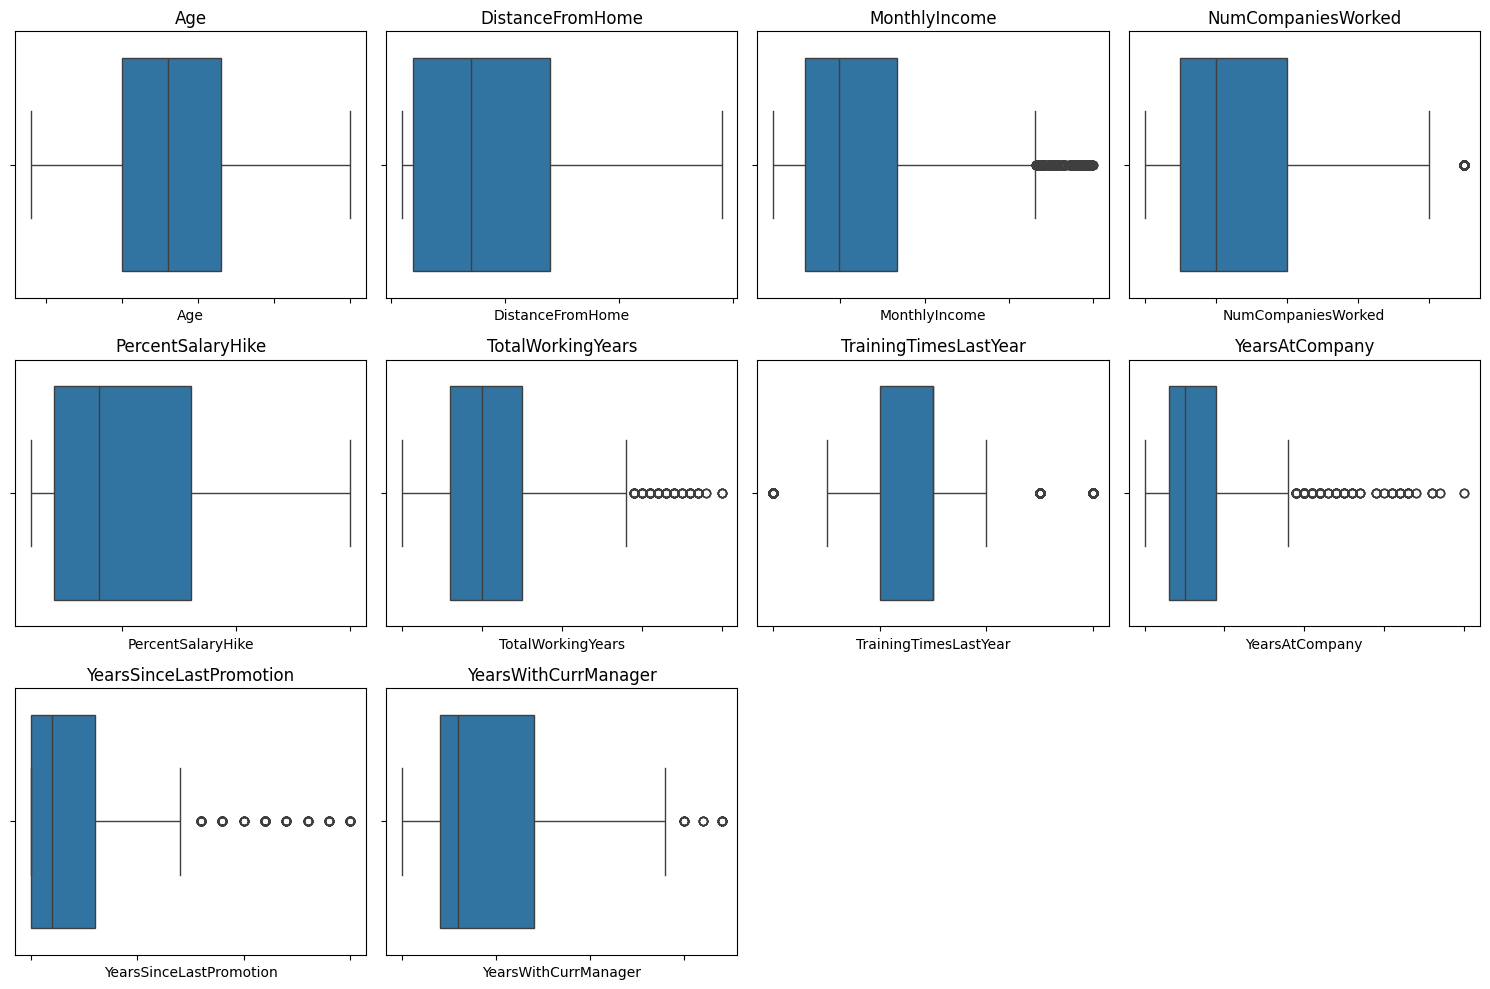

In [ ]:
# Numeric Type Data Distribution through Box Plot
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_columns, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

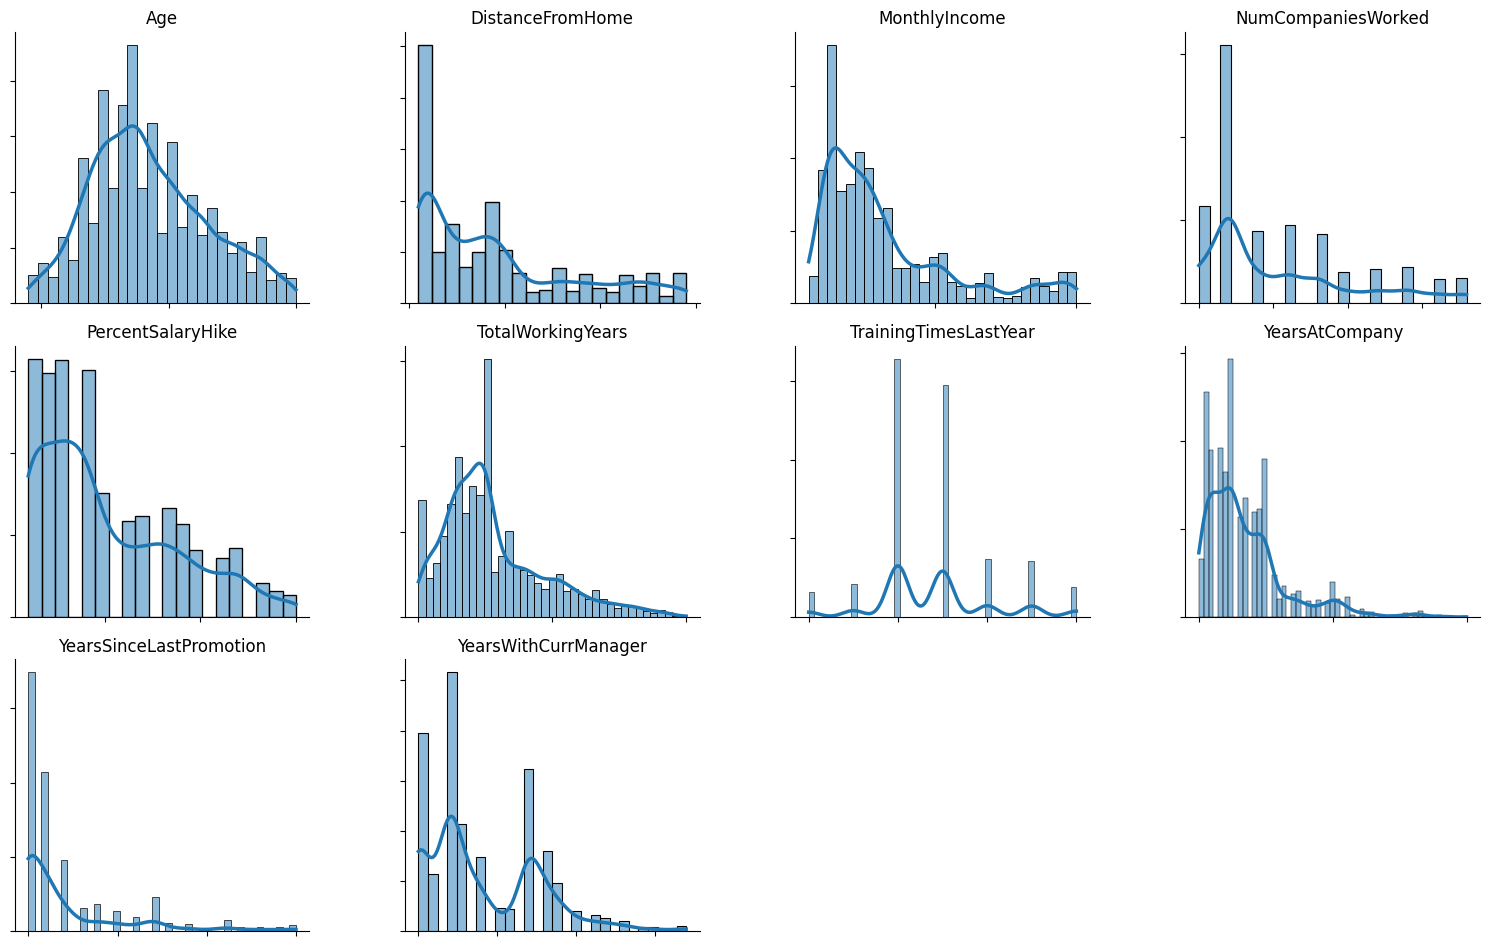

In [ ]:
# Numeric Type Data Distribution through Normality Graph
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=df[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

### df: Multivariate Analysis

Since we don't wants to encode those categoric features, make sure to make a copy first to be processed.

In [ ]:
# df's Copy
df_2 = df.copy()

In [ ]:
# Get Code Encoding
for column in cat_columns:
  df_2[column] = df_2[column].astype('category')
  df_2[column] = df_2[column].cat.codes

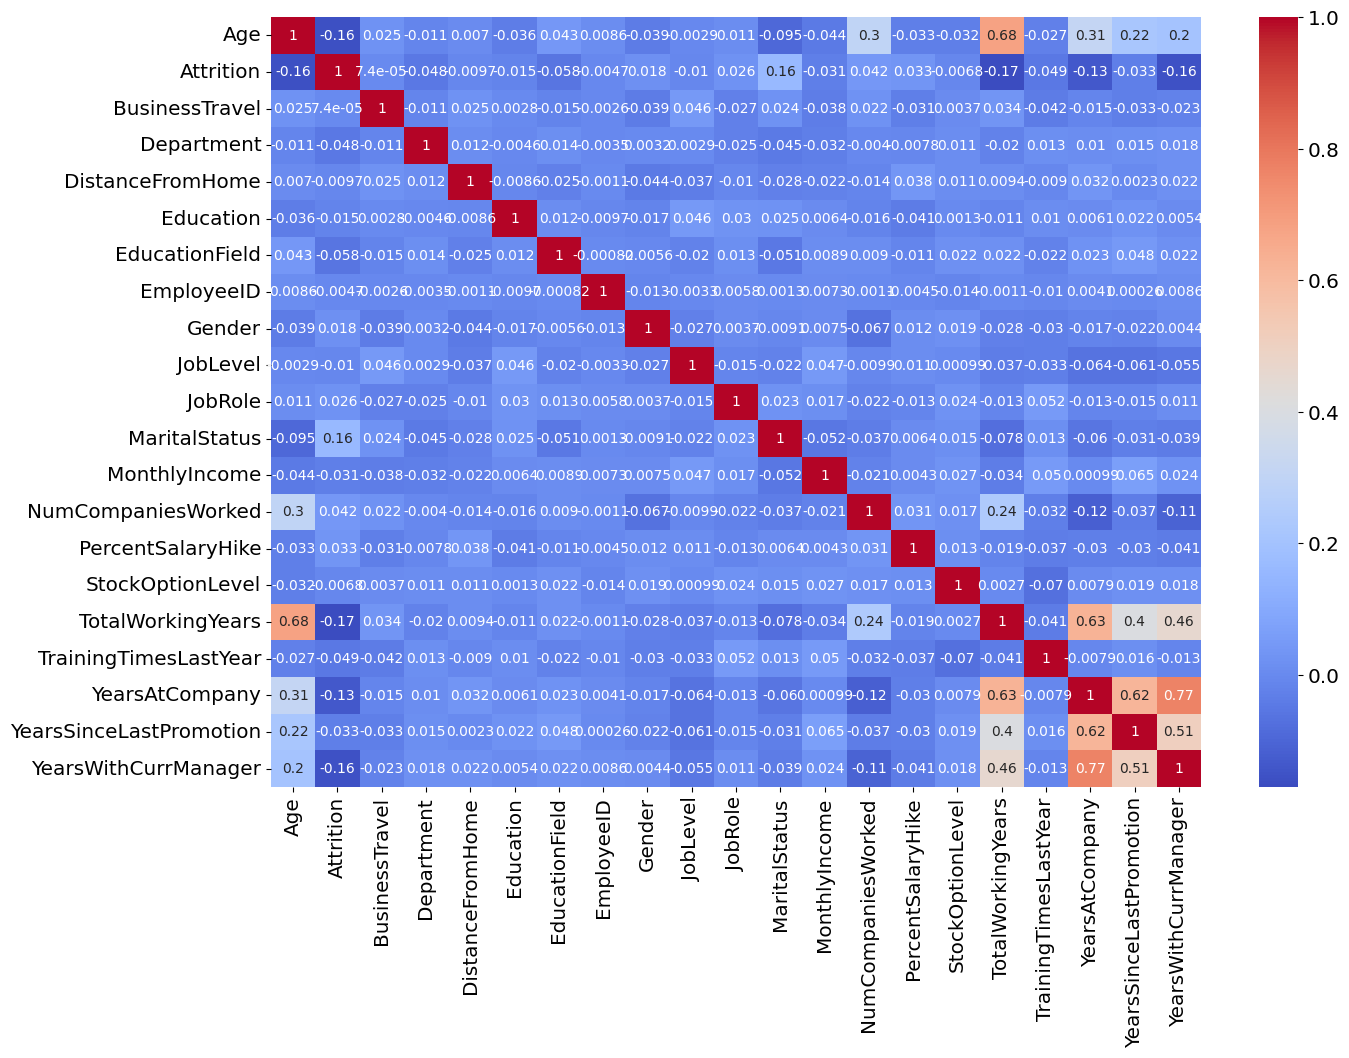

In [ ]:
# Heatmap Correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm')
plt.show()

## df_employee_survey

In [ ]:
# Getting Features' Info
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   int64   
 1   EnvironmentSatisfaction  4385 non-null   category
 2   JobSatisfaction          4390 non-null   category
 3   WorkLifeBalance          4372 non-null   category
dtypes: category(3), int64(1)
memory usage: 48.1 KB


In [ ]:
from pandas.api.types import CategoricalDtype

# Declare The Order to Order The Ordinals
ordered_categories = [1, 2, 3, 4]

# Apply
for column in df_employee_survey.columns[1:]:
  df_employee_survey[column] = df_employee_survey[column].astype(CategoricalDtype(categories=ordered_categories, ordered=True))

In [ ]:
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   int64   
 1   EnvironmentSatisfaction  4385 non-null   category
 2   JobSatisfaction          4390 non-null   category
 3   WorkLifeBalance          4372 non-null   category
dtypes: category(3), int64(1)
memory usage: 48.1 KB


In [ ]:
# Describe
df_employee_survey.describe(include='category')

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4385,4390,4372
unique,4,4,4
top,3,4,3
freq,1350,1367,2660


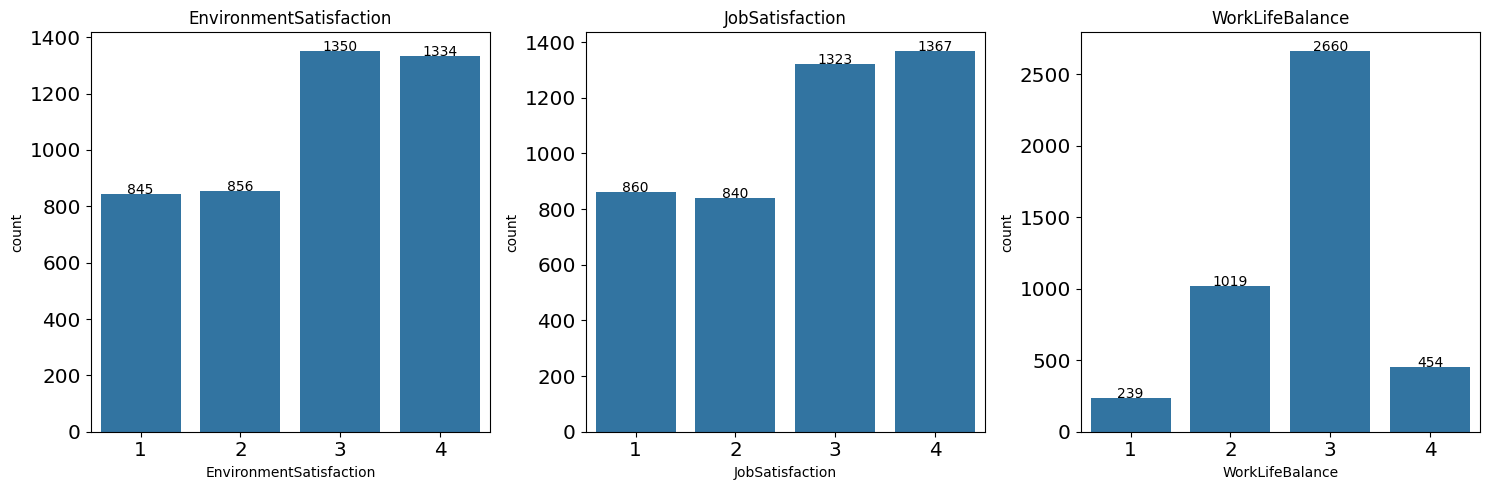

In [ ]:
# Data Visualization
df_employee_survey_2 = df_employee_survey.copy()
df_employee_survey_2 = df_employee_survey_2.drop(columns='EmployeeID')

plt.figure(figsize=(5 * len(df_employee_survey_2.columns), 5))
for i, column in enumerate(df_employee_survey_2.columns):
  plt.subplot(1, len(df_employee_survey_2.columns), i + 1)
  sns.countplot(x=df_employee_survey_2[column])
  plt.title(column)
  total = len(df_employee_survey_2[column])
  for p in plt.gca().patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(int(count), (x, y), ha='center')

plt.tight_layout()
plt.show()

## df_manager_survey

In [ ]:
# Getting Features' Info
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   EmployeeID         4410 non-null   int64   
 1   JobInvolvement     4410 non-null   category
 2   PerformanceRating  4410 non-null   category
dtypes: category(2), int64(1)
memory usage: 43.6 KB


In [ ]:
# Declare The Order
ordered_categories = [1, 2, 3, 4]

# Apply
for column in df_manager_survey.columns[1:]:
  df_manager_survey[column] = df_manager_survey[column].astype(CategoricalDtype(categories=ordered_categories, ordered=True))

In [ ]:
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   EmployeeID         4410 non-null   int64   
 1   JobInvolvement     4410 non-null   category
 2   PerformanceRating  4410 non-null   category
dtypes: category(2), int64(1)
memory usage: 43.6 KB


In [ ]:
# Describe
df_manager_survey.describe(include='category')

,JobInvolvement,PerformanceRating
count,4410,4410
unique,4,2
top,3,3
freq,2604,3732


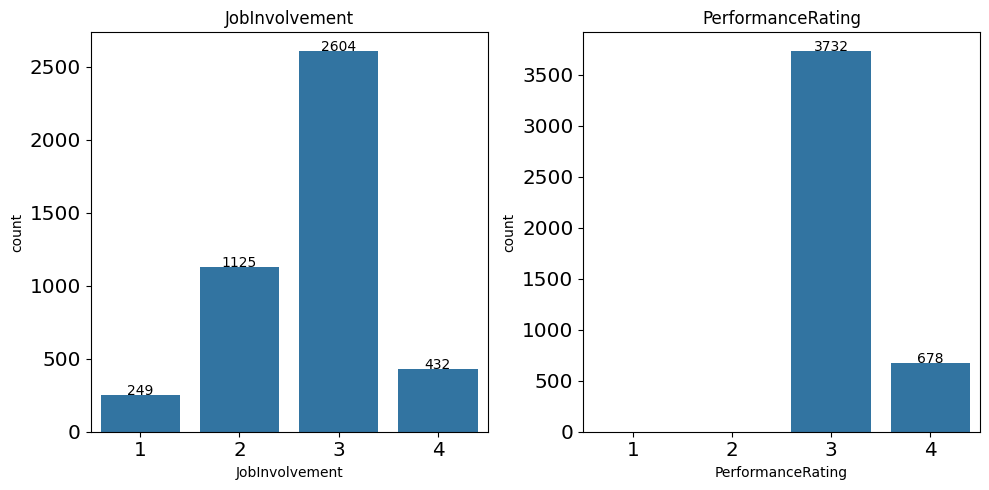

In [ ]:
# Data Visualization

df_manager_survey_2 = df_manager_survey.copy()
df_manager_survey_2 = df_manager_survey_2.drop(columns='EmployeeID')

plt.figure(figsize=(5 * len(df_manager_survey_2.columns), 5))
for i, column in enumerate(df_manager_survey_2.columns):
  plt.subplot(1, len(df_manager_survey_2.columns), i + 1)
  sns.countplot(x=df_manager_survey_2[column])
  plt.title(column)
  total = len(df_manager_survey_2[column])
  for p in plt.gca().patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(int(count), (x, y), ha='center')

plt.tight_layout()
plt.show()

## df_in_time

In [ ]:
# Data Preview
df_in_time.head(3)

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,Tidak Hadir,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,Tidak Hadir,2015-01-15 10:01:24,2015-01-16 10:19:08,Tidak Hadir,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,Tidak Hadir,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,Tidak Hadir,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,Tidak Hadir,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,Tidak Hadir,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,20

In [ ]:
# Columns' Rename
df_in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

In [ ]:
# Replace NA with 'Tidak Hadir', means 'absence'
for i in df_in_time:
  df_in_time[i] = df_in_time[i].replace(np.nan, 'Tidak Hadir')

In [ ]:
# Drop EmployeeID
df_in_time.drop(columns = 'EmployeeID', inplace= True)

KeyError: "['EmployeeID'] not found in axis"

In [ ]:
# Make a list of time-in
time_in = []

# Loop through the data to get the time data
for i, j in df_in_time.iterrows():
  for k in j.values:
    # Take those non 'Tidak Hadir' value
    if k != 'Tidak Hadir':
      time_in.append(k)

## df_out_time

In [ ]:
# Data Preview
df_out_time.head(3)

In [ ]:
# Column's Rename
df_out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

In [ ]:
# Replace NA with 'Tidak Hadir', means 'absence'
for i in df_out_time:
  df_out_time[i] = df_out_time[i].replace(np.nan, 'Tidak Hadir')

In [ ]:
# Drop EmployeeID
df_out_time.drop(columns = 'EmployeeID', inplace= True)

In [ ]:
# Make a list of time-out
time_out = []

# Loop through the data to get the time data
for i, j in df_out_time.iterrows():
  for k in j.values:
    # Take those non 'Tidak Hadir' value
    if k != 'Tidak Hadir':
      time_out.append(k)

# Data Extraction: Employee Working Hours (df_working_hours)

In [ ]:
# Declare the time pattern
time_pattern = r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}"

In [ ]:
# time into dataframe

time_in = pd.DataFrame(time_in)
time_out = pd.DataFrame(time_out)

time_in.rename(columns={0:'time_in'}, inplace=True)
time_out.rename(columns={0:'time_out'}, inplace=True)

# convert into datetime

time_in = pd.to_datetime(time_in['time_in'])
time_out = pd.to_datetime(time_out['time_out'])

# time difference

time_diff = time_out - time_in
time_diff = time_diff.dt.total_seconds() / 3600
time_diff = round(time_diff, 1)

# get data to replace

df_working_hours = df_out_time.copy()

# value replace
## into working hours
replaced = 0

for i in range(len(df_working_hours)):
  for j in df_working_hours.columns:
    value = df_working_hours.at[i, j]
    if isinstance(value, str) and re.fullmatch(time_pattern, value):
      if replaced < len(time_diff):
        df_working_hours.at[i, j] = time_diff[replaced]
        replaced += 1

## absent
for index in df_working_hours.index:
  for col in df_working_hours.columns:
    if df_working_hours.at[index, col] == 'Tidak Hadir':
      df_working_hours.at[index, col] = 0

# insert average employee working hours
df_working_hours['avg_working_hours'] = df_working_hours.mean(axis= 1)

# insert employeeid
df_working_hours.insert(loc=0, column='EmployeeID', value=df['EmployeeID'])

In [ ]:
# Data Preview
df_working_hours.head(3)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,avg_working_hours
0,1,0,7.2,7.2,7.4,7.0,7.3,7.5,7.3,7.8,0,7.3,7.3,0,6.8,7.1,7.1,7.6,0,7.6,7.1,7.4,6.8,6.9,7.2,7.6,7.6,7.5,7.6,7.3,7.2,7.4,7.2,7.6,7.4,7.8,0,7.8,7.4,7.2,7.6,7.2,7.4,7.2,6.8,7.7,0,7.8,7.4,6.9,7.2,7.1,7.3,0,6.9,7.2,7.8,7.2,7.6,7.3,7.4,0,7.6,7.4,7.9,7.3,7.7,7.2,7.0,7.6,7.4,7.8,7.1,7.3,7.1,7.5,7.8,7.3,7.7,7.0,7.5,7.3,7.6,7.2,7.9,7.7,7.5,0,7.4,7.3,7.5,7.1,7.6,0,7.4,7.5,7.9,6.8,0,7.3,7.3,7.5,7.1,7.6,7.2,7.9,7.4,0,0,7.7,7.5,7.0,0,7.1,0,7.1,7.6,7.4,7.6,7.5,7.5,7.5,7.2,7.2,6.9,7.1,7.8,7.1,7.7,7.3,7.7,7.6,7.2,7.9,7.7,7.5,6.9,7.4,7.3,7.1,7.6,7.3,0,7.1,7.3,7.9,6.7,7.5,7.5,6.7,7.1,7.2,7.4,6.9,7.2,7.7,7.5,7.4,7.6,7.5,7.6,7.4,7.1,7.1,7.6,6.9,7.2,7.7,7.5,7.4,7.7,7.7,7.6,7.0,0,7.2,7.4,7.5,7.4,7.3,7.5,7.4,7.3,6.9,7.1,7.3,0,7.5,7.4,7.7,7.0,7.3,7.7,7.6,7.6,7.4,7.8,0,7.0,7.7,7.4,7.5,7.6,7.2,0,7.5,7.6,6.8,7.5,7.0,0,0,7.2,7.7,7.1,7.7,7.1,7.3,6.9,7.6,6.9,7.6,7.0,0,0,0,7.2,7.3,7.8,7.1,7.4,7.0,7.8,7.3,7.6,7.4,7.4,7.1,7.0,7.4,7.6,7.6,7.1,6.9,7.9,7.9,7.2,7.7,7.5,0,7.6,0,0,7.3,7.4,6.5,7.6,0,7.8,7.3,7.8,7.1,6.55249
1,2,0,8.1,7.5,0,7.4,7.4,7.2,7.6,7.3,0,7.6,7.7,7.6,7.6,7.9,7.4,7.8,0,7.5,7.2,7.3,7.1,7.6,7.6,7.6,7.6,7

## df_working_hours: EDA

In [ ]:
# separation by attrition status

df_working_hours_resigned = df_working_hours[df_working_hours['EmployeeID'].isin(df[df['Attrition'] == 'Yes']['EmployeeID'])]
df_working_hours_not_resigned = df_working_hours[df_working_hours['EmployeeID'].isin(df[df['Attrition'] == 'No']['EmployeeID'])]

df_working_hours_resigned = df_working_hours_resigned.drop(columns=['EmployeeID', 'avg_working_hours'])
df_working_hours_not_resigned = df_working_hours_not_resigned.drop(columns=['EmployeeID', 'avg_working_hours'])

# transpose

df_working_hours_resigned = df_working_hours_resigned.transpose()
df_working_hours_not_resigned = df_working_hours_not_resigned.transpose()

# getting its average

df_working_hours_not_resigned['mean'] = df_working_hours_not_resigned.mean(axis=1)
df_working_hours_resigned['mean'] = df_working_hours_resigned.mean(axis=1)

# average cleansing

df_working_hours_resigned = df_working_hours_resigned[df_working_hours_resigned['mean'] != 0]
df_working_hours_not_resigned = df_working_hours_not_resigned[df_working_hours_not_resigned['mean'] != 0]

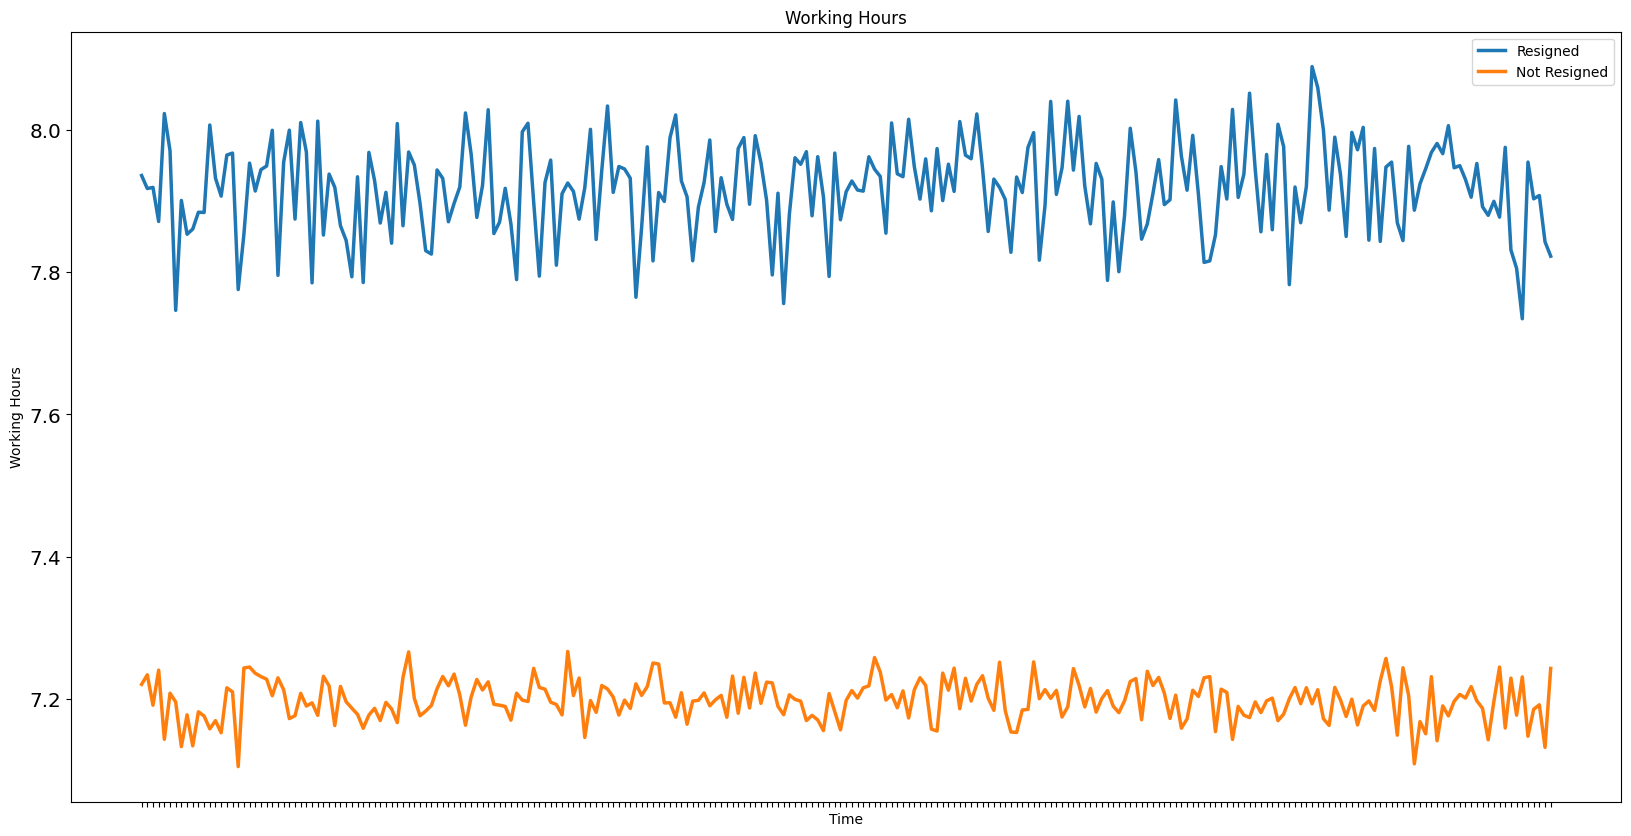

In [ ]:
# Data Visualization
plt.figure(figsize=(20, 10))
plt.plot(df_working_hours_resigned.index, df_working_hours_resigned['mean'], label='Resigned')
plt.plot(df_working_hours_not_resigned.index, df_working_hours_not_resigned['mean'], label='Not Resigned')
plt.xlabel('Time')
plt.ylabel('Working Hours')
plt.title('Working Hours')
plt.xticks(visible=False)
plt.legend()
plt.show()

# Data Merge: all_df

In [ ]:
'''
Merge all the data in purpose to see everything about those employees
'''
all_df = pd.merge(df, df_employee_survey, on='EmployeeID', how='left')
all_df = pd.merge(all_df, df_manager_survey, on='EmployeeID', how='left')
all_df['AvgWorkingHours'] = df_working_hours['avg_working_hours'].astype(float)
all_df.drop(columns=['EmployeeID'], inplace=True)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   Gender                   4410 non-null   category
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   category
 10  MaritalStatus            4410 non-null   category
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4391 non-null   float64 
 13  PercentSalaryHike        4410 non-null   int64   
 14  StockOpt

## Target n Features Separation

In [ ]:
'''
x is the features
y is the target
'''
x = all_df.drop(columns=['Attrition'])
y = all_df['Attrition']

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

'''
Split into 7:1.5:1.5
'''
# data train
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# data test and data validator
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((3087, 25), (3087,), (661, 25), (661,), (662, 25), (662,))

## Advanced Features Grouping

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3087 entries, 500 to 860
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      3087 non-null   int64   
 1   BusinessTravel           3087 non-null   category
 2   Department               3087 non-null   category
 3   DistanceFromHome         3087 non-null   int64   
 4   Education                3087 non-null   int64   
 5   EducationField           3087 non-null   category
 6   Gender                   3087 non-null   category
 7   JobLevel                 3087 non-null   int64   
 8   JobRole                  3087 non-null   category
 9   MaritalStatus            3087 non-null   category
 10  MonthlyIncome            3087 non-null   int64   
 11  NumCompaniesWorked       3074 non-null   float64 
 12  PercentSalaryHike        3087 non-null   int64   
 13  StockOptionLevel         3087 non-null   int64   
 14  TotalWorking

In [ ]:
'''
Since the data are merged, the features have to be separated for further processing
'''
num_columns_2 = x_train.select_dtypes(include=['int64', 'float64']).columns
num_columns_2 = num_columns_2.drop(ordinal_cat_columns)

cat_columns_2 = x_train.columns[~x_train.columns.isin(num_columns_2)]

In [ ]:
print(f'num_columns_2: {num_columns_2}')
print(f'cat_columns_2: {cat_columns_2}')

num_columns_2: Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'AvgWorkingHours'],
      dtype='object')
cat_columns_2: Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')


In [ ]:
# To see each categoric features' values
for column_name in cat_columns_2:
  print(f'{column_name}: {x_train[column_name].unique()}')

BusinessTravel: ['Travel_Rarely', 'Non-Travel', 'Travel_Frequently']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department: ['Research & Development', 'Sales', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']
Education: [3 2 4 1 5]
EducationField: ['Life Sciences', 'Other', 'Medical', 'Technical Degree', 'Marketing', 'Human Resources']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
                         'Technical Degree']
Gender: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
JobLevel: [2 1 3 5 4]
JobRole: ['Research Scientist', 'Sales Executive', 'Laboratory Technician', 'Manufacturing Director', 'Sales Representative', 'Research Director', 'Human Resources', 'Healthcare Representative', 'Manager']
Categories (9, object): ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', ...,
                         'Re

In [ ]:
'''
if u think about it, BusinessTravel's values are ordinal.
So there goes the values mapping.
'''
# Mapping
business_travel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

# Apply
x_train['BusinessTravel'] = x_train['BusinessTravel'].map(business_travel_map)
x_test['BusinessTravel'] = x_test['BusinessTravel'].map(business_travel_map)
x_val['BusinessTravel'] = x_val['BusinessTravel'].map(business_travel_map)

In [ ]:
# Ordinal Mapping
order = [1, 2, 3, 4]

# Post-Merged Ordinal Categoric Columns
ordinal_cat_columns_2 = []

for col in cat_columns_2:
  if x_train[col].isin(order).any():
    ordinal_cat_columns_2.append(col)

# Post-Merged Nominal Categoric Columns
ohe_columns_2 = cat_columns_2[(~cat_columns_2.isin(ordinal_cat_columns_2))]

In [ ]:
# Conversion
x_train[ordinal_cat_columns_2] = x_train[ordinal_cat_columns_2].astype('category')
x_test[ordinal_cat_columns_2] = x_test[ordinal_cat_columns_2].astype('category')
x_val[ordinal_cat_columns_2] = x_val[ordinal_cat_columns_2].astype('category')

x_train[ohe_columns_2] = x_train[ohe_columns_2].astype('category')
x_test[ohe_columns_2] = x_test[ohe_columns_2].astype('category')
x_val[ohe_columns_2] = x_val[ohe_columns_2].astype('category')

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3087 entries, 500 to 860
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      3087 non-null   int64   
 1   BusinessTravel           3087 non-null   category
 2   Department               3087 non-null   category
 3   DistanceFromHome         3087 non-null   int64   
 4   Education                3087 non-null   category
 5   EducationField           3087 non-null   category
 6   Gender                   3087 non-null   category
 7   JobLevel                 3087 non-null   category
 8   JobRole                  3087 non-null   category
 9   MaritalStatus            3087 non-null   category
 10  MonthlyIncome            3087 non-null   int64   
 11  NumCompaniesWorked       3074 non-null   float64 
 12  PercentSalaryHike        3087 non-null   int64   
 13  StockOptionLevel         3087 non-null   category
 14  TotalWorking

# Preprocessing

## Duplicates

Those duplicates are going to be deleted.

In [ ]:
x_train.duplicated().sum()

np.int64(0)

In [ ]:
x_train.drop_duplicates(inplace=True)

In [ ]:
'''
Target should be reshaped since some rows in the features are deleted due to the duplicates.
'''
y_train = y_train[x_train.index]

## Missing Values

In [ ]:
# To see how much each features lost their values
for i in x_train:
  missing = x_train[i].isna().sum()
  proportion = missing / len(df) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

Age: 0 (0.00%)
BusinessTravel: 0 (0.00%)
Department: 0 (0.00%)
DistanceFromHome: 0 (0.00%)
Education: 0 (0.00%)
EducationField: 0 (0.00%)
Gender: 0 (0.00%)
JobLevel: 0 (0.00%)
JobRole: 0 (0.00%)
MaritalStatus: 0 (0.00%)
MonthlyIncome: 0 (0.00%)
NumCompaniesWorked: 13 (0.29%)
PercentSalaryHike: 0 (0.00%)
StockOptionLevel: 0 (0.00%)
TotalWorkingYears: 6 (0.14%)
TrainingTimesLastYear: 0 (0.00%)
YearsAtCompany: 0 (0.00%)
YearsSinceLastPromotion: 0 (0.00%)
YearsWithCurrManager: 0 (0.00%)
EnvironmentSatisfaction: 21 (0.48%)
JobSatisfaction: 14 (0.32%)
WorkLifeBalance: 28 (0.63%)
JobInvolvement: 0 (0.00%)
PerformanceRating: 0 (0.00%)
AvgWorkingHours: 0 (0.00%)


In [ ]:
# Imputation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_imputer = Pipeline([
  ('imputer', SimpleImputer(strategy='median'))
])

cat_imputer = Pipeline([
  ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
# Apply Pipeline
x_train[num_columns_2] = num_imputer.fit_transform(x_train[num_columns_2])
x_train[cat_columns_2] = cat_imputer.fit_transform(x_train[cat_columns_2])

x_val[num_columns_2] = num_imputer.transform(x_val[num_columns_2])
x_val[cat_columns_2] = cat_imputer.transform(x_val[cat_columns_2])

x_test[num_columns_2] = num_imputer.transform(x_test[num_columns_2])
x_test[cat_columns_2] = cat_imputer.transform(x_test[cat_columns_2])

In [ ]:
# Post-Imputation
for i in x_train:
  missing = x_train[i].isna().sum()
  proportion = missing / len(df) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

Age: 0 (0.00%)
BusinessTravel: 0 (0.00%)
Department: 0 (0.00%)
DistanceFromHome: 0 (0.00%)
Education: 0 (0.00%)
EducationField: 0 (0.00%)
Gender: 0 (0.00%)
JobLevel: 0 (0.00%)
JobRole: 0 (0.00%)
MaritalStatus: 0 (0.00%)
MonthlyIncome: 0 (0.00%)
NumCompaniesWorked: 0 (0.00%)
PercentSalaryHike: 0 (0.00%)
StockOptionLevel: 0 (0.00%)
TotalWorkingYears: 0 (0.00%)
TrainingTimesLastYear: 0 (0.00%)
YearsAtCompany: 0 (0.00%)
YearsSinceLastPromotion: 0 (0.00%)
YearsWithCurrManager: 0 (0.00%)
EnvironmentSatisfaction: 0 (0.00%)
JobSatisfaction: 0 (0.00%)
WorkLifeBalance: 0 (0.00%)
JobInvolvement: 0 (0.00%)
PerformanceRating: 0 (0.00%)
AvgWorkingHours: 0 (0.00%)


# Features Selection

In [ ]:
'''
These are the package that will be used for feature selection using partial significance testing.
'''
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2

The Features Selection process will be based on A/B testing. <br>
Since the data are containing both categoric and numeric type data, each will goes through different method. <br>
The numeric features significance tests are using logistic regression, whil categoric features significance tests are using maximum likelihood.

This will be applied to each feature, and since it's A/B testing, here's the hypothesis: <br>
h0: the feature isn't significantly influenced the target. <br>
h1: the feature is significantly influenced the target.

The thereshold is alpha = 0.05, with decision making is take h1 if the p-value of each feature is less than alpha.

The output will show which features that influenced the target significantly. <br>
Those features that doesn't have significant influence will be eliminated, while those who does will be kept.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import statsmodels.formula.api as smf
from scipy.stats import chi2

# Significant Features
significant_num = []
significant_cat = []
significants = []

# Pipeline
class StatisticalFeatureSelector(BaseEstimator, TransformerMixin):
	def __init__(self, num_cols, cat_cols, target='attrition', p_threshold=0.05):
		self.num_cols = num_cols
		self.cat_cols = cat_cols
		self.target = target
		self.p_threshold = p_threshold
		self.significant_features = []

	def fit(self, x, y):
		global significant_num, significant_cat, significants

		df = x.copy()
		df[self.target] = y.map({'No': 0, 'Yes': 1}).astype(int)

		# Numeric feature p-values
		formula = self.target + ' ~ ' + ' + '.join(self.num_cols)
		base_model = smf.logit(formula, data=df).fit(disp=False)
		numeric_pvalues = base_model.pvalues.drop('Intercept')

		significant_num = numeric_pvalues[numeric_pvalues < self.p_threshold].index.tolist()

		# Categorical feature p-values
		significant_cat = []
		for var in self.cat_cols:
			formula_full = formula + f' + C({var})'
			try:
				model_full = smf.logit(formula_full, data=df).fit(disp=False)
				model_reduced = base_model
				lr_stat = 2 * (model_full.llf - model_reduced.llf)
				df_diff = model_full.df_model - model_reduced.df_model
				p_val = chi2.sf(lr_stat, df_diff)
				if p_val < self.p_threshold:
					significant_cat.append(var)
			except:
				pass

		significants = significant_num + significant_cat
		self.significant_features = significants
		return self

	def transform(self, x):
		return x[self.significant_features]

In [ ]:
# apply pipeline
selector = StatisticalFeatureSelector(num_columns_2, cat_columns_2)
x_train = selector.fit_transform(x_train, y_train)
x_test = selector.transform(x_test)
x_val = selector.transform(x_val)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3087 entries, 500 to 860
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3087 non-null   float64
 1   NumCompaniesWorked       3087 non-null   float64
 2   TotalWorkingYears        3087 non-null   float64
 3   TrainingTimesLastYear    3087 non-null   float64
 4   YearsSinceLastPromotion  3087 non-null   float64
 5   YearsWithCurrManager     3087 non-null   float64
 6   AvgWorkingHours          3087 non-null   float64
 7   BusinessTravel           3087 non-null   object 
 8   Department               3087 non-null   object 
 9   EducationField           3087 non-null   object 
 10  JobLevel                 3087 non-null   object 
 11  JobRole                  3087 non-null   object 
 12  MaritalStatus            3087 non-null   object 
 13  EnvironmentSatisfaction  3087 non-null   object 
 14  JobSatisfaction          308

# Advanced Preprocessing

## Final Features Grouping

In [ ]:
'''
Since the data are reduced due to features selection,
there goes the features grouping again
'''
final_num_columns = [col for col in num_columns_2 if col in significants]
final_cat_columns = [col for col in cat_columns_2 if col in significants]
final_ordinal_cat_columns = [col for col in ordinal_cat_columns_2 if col in significants]
final_ohe_columns = [col for col in ohe_columns_2 if col in significants]

In [ ]:
print(f'final_num_columns: {final_num_columns}')
print(f'final_cat_columns: {final_cat_columns}')
print(f'final_ordinal_cat_columns: {final_ordinal_cat_columns}')
print(f'final_ohe_columns: {final_ohe_columns}')

final_num_columns: ['Age', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AvgWorkingHours']
final_cat_columns: ['BusinessTravel', 'Department', 'EducationField', 'JobLevel', 'JobRole', 'MaritalStatus', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
final_ordinal_cat_columns: ['BusinessTravel', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
final_ohe_columns: ['Department', 'EducationField', 'JobRole', 'MaritalStatus']


In [ ]:
len(significants)

16

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3087 entries, 500 to 860
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3087 non-null   float64
 1   NumCompaniesWorked       3087 non-null   float64
 2   TotalWorkingYears        3087 non-null   float64
 3   TrainingTimesLastYear    3087 non-null   float64
 4   YearsSinceLastPromotion  3087 non-null   float64
 5   YearsWithCurrManager     3087 non-null   float64
 6   AvgWorkingHours          3087 non-null   float64
 7   BusinessTravel           3087 non-null   object 
 8   Department               3087 non-null   object 
 9   EducationField           3087 non-null   object 
 10  JobLevel                 3087 non-null   object 
 11  JobRole                  3087 non-null   object 
 12  MaritalStatus            3087 non-null   object 
 13  EnvironmentSatisfaction  3087 non-null   object 
 14  JobSatisfaction          308

## Outliers

Numeric features transformation and rescale

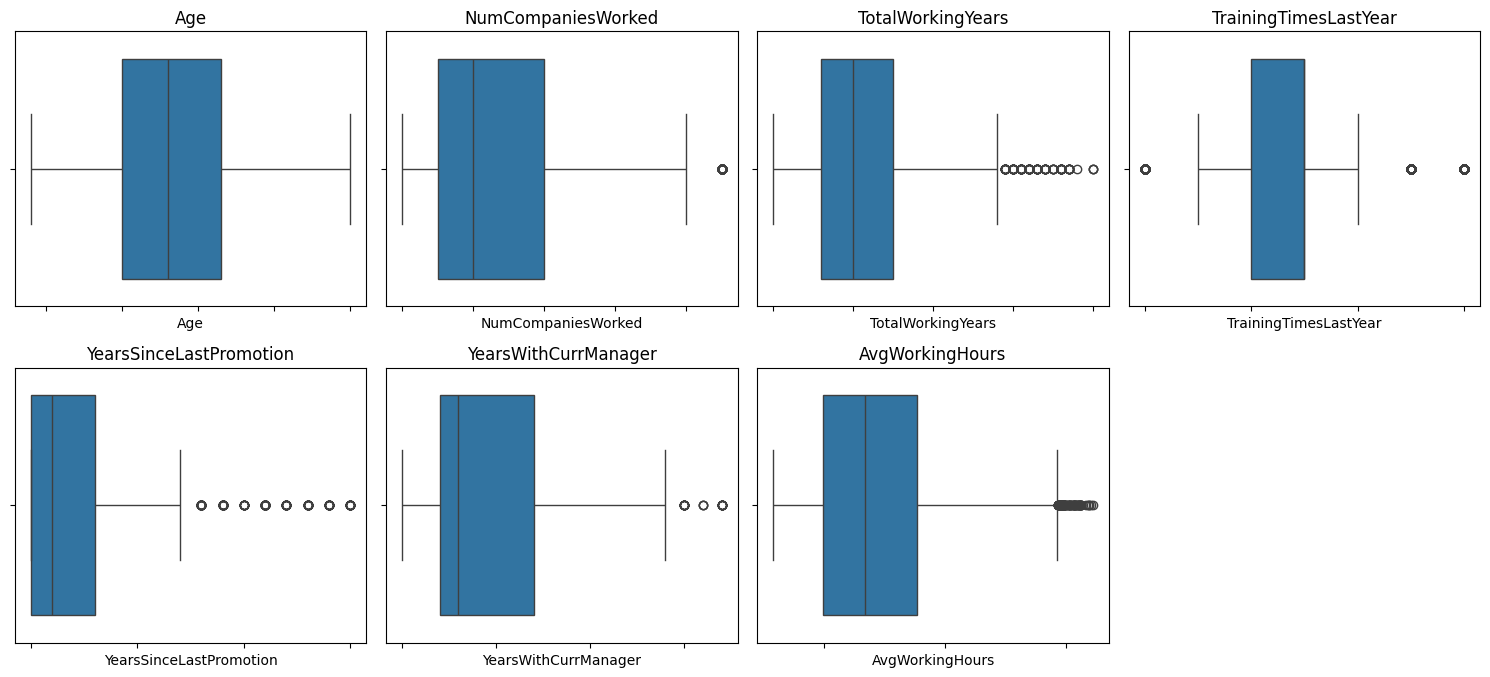

In [ ]:
# Pre Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=x_train[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

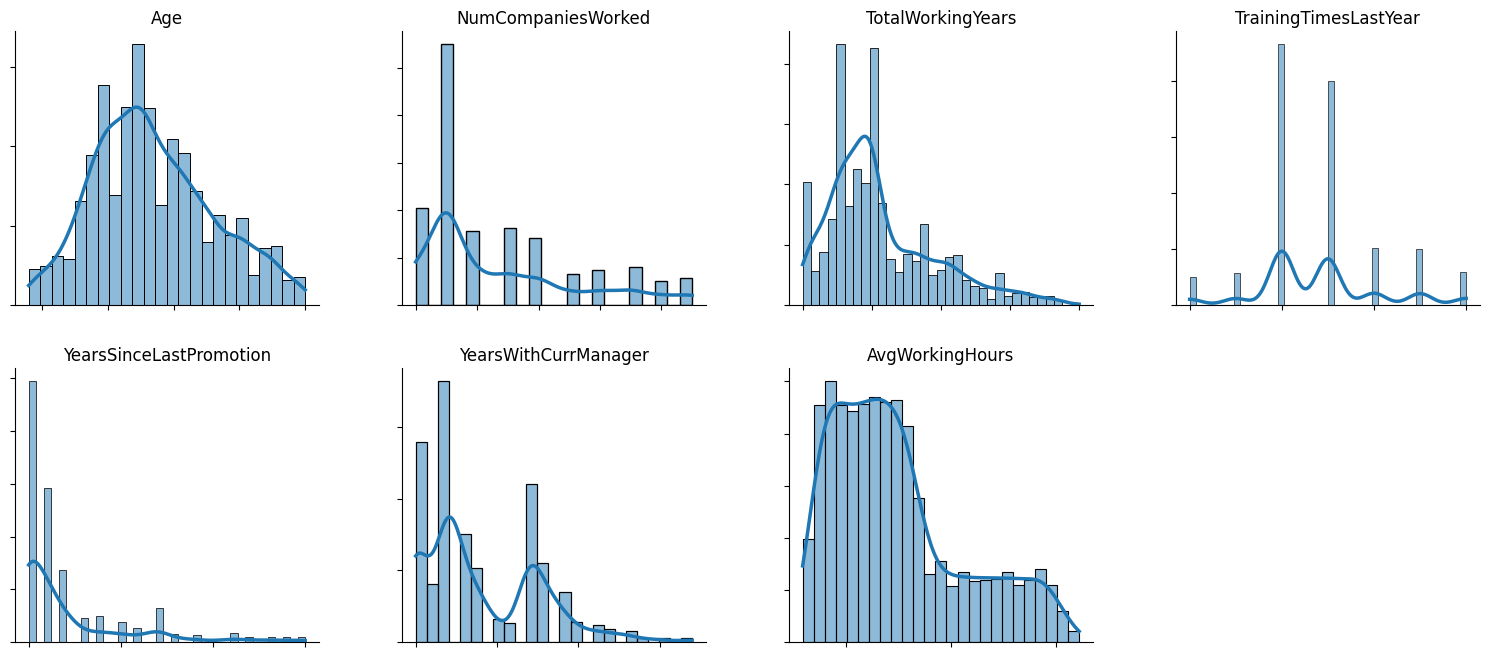

In [ ]:
# Pre Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=x_train[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Custom log1p transformer
class LogTransformer(BaseEstimator, TransformerMixin):
	def fit(self, x, y=None):
		return self

	def transform(self, x):
		return np.log1p(x)

# Numeric transformation pipeline
num_pipeline = Pipeline([
	('log', LogTransformer()),
	('scaler', RobustScaler())
])

# Pipeline
num_preprocessor = ColumnTransformer([
	('num', num_pipeline, final_num_columns)
])

In [ ]:
# apply pipeline
x_train[final_num_columns] = num_preprocessor.fit_transform(x_train[final_num_columns])
x_test[final_num_columns] = num_preprocessor.transform(x_test[final_num_columns])
x_val[final_num_columns] = num_preprocessor.transform(x_val[final_num_columns])

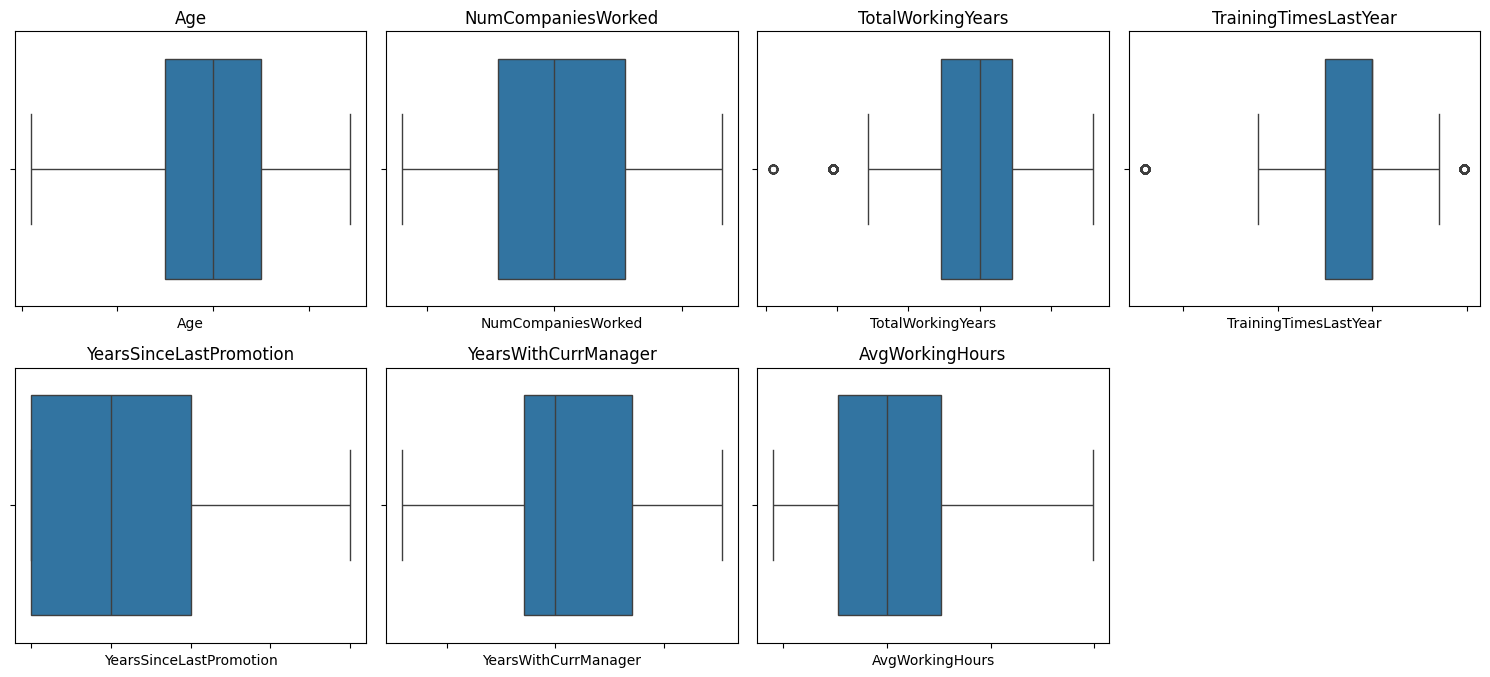

In [ ]:
# Post Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=x_train[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

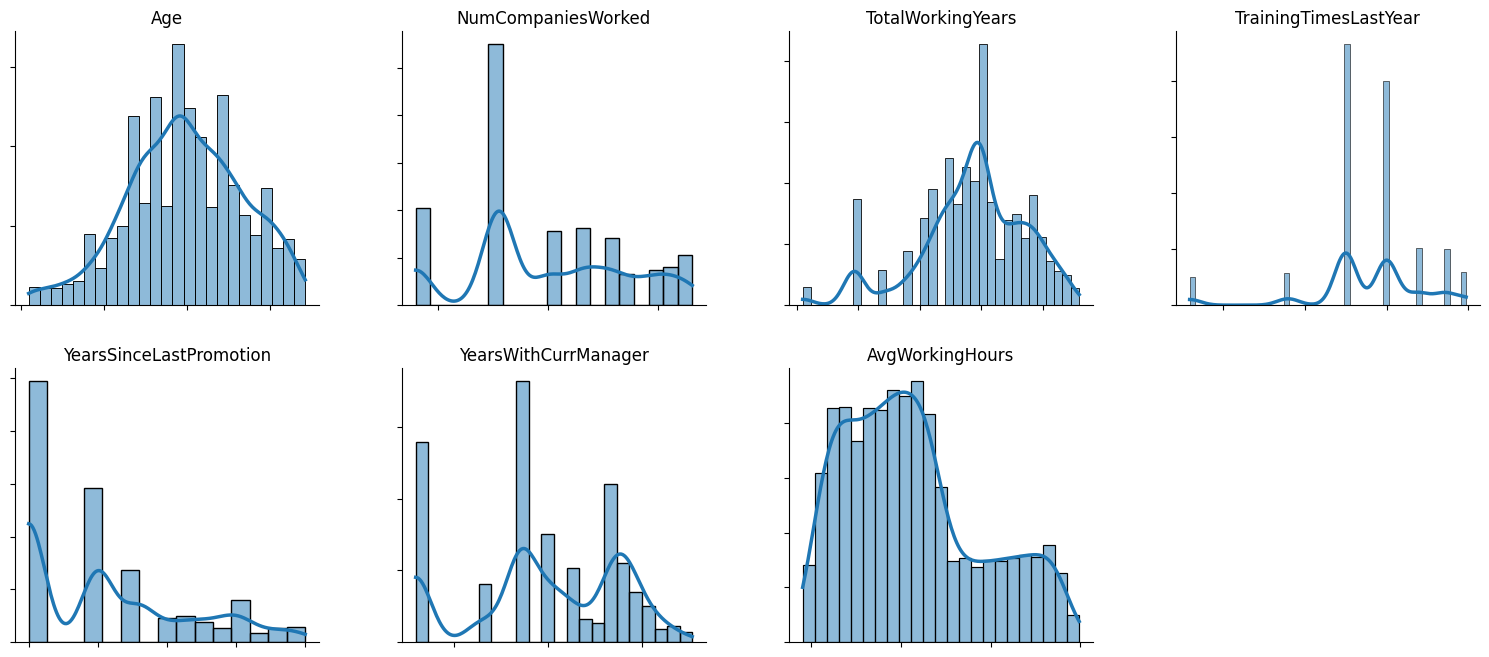

In [ ]:
# Post Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=x_train[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

## Data Encode

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### Ordinal Encoding

In [ ]:
# To see each ordinal categoric's values
for col in final_ordinal_cat_columns:
  print(f'{col}: {x_train[col].unique()}')

BusinessTravel: [1 0 2]
JobLevel: [2 1 3 5 4]
EnvironmentSatisfaction: [2 4 3 1]
JobSatisfaction: [4 3 2 1]
WorkLifeBalance: [1 3 4 2]


In [ ]:
# Declare the order
ordinal_categories = [
	sorted(x_train[col].dropna().unique().tolist())
	for col in final_ordinal_cat_columns
]

# Pipeline
ordinal_encode = Pipeline([
	('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))
])

In [ ]:
x_train[final_ordinal_cat_columns] = ordinal_encode.fit_transform(x_train[final_ordinal_cat_columns])
x_test[final_ordinal_cat_columns] = ordinal_encode.transform(x_test[final_ordinal_cat_columns])
x_val[final_ordinal_cat_columns] = ordinal_encode.transform(x_val[final_ordinal_cat_columns])

In [ ]:
x_train[final_ordinal_cat_columns]

,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
500,1.0,1.0,1.0,3.0,0.0
3043,1.0,1.0,3.0,2.0,2.0
2633,0.0,0.0,2.0,1.0,0.0
549,1.0,0.0,2.0,2.0,2.0
557,1.0,0.0,3.0,1.0,3.0
...,...,...,...,...,...
3444,2.0,1.0,0.0,0.0,2.0
466,1.0,0.0,3.0,2.0,2.0
3092,1.0,0.0,2.0,3.0,2.0
3772,1.0,0.0,2.0,0.0,2.0


In [ ]:
# # Apply the order
# for col in final_ordinal_cat_columns:
#   order = list(range(min(x_train[col]), max(x_train[col]) + 1))
#   x_train[col] = x_train[col].astype('category').cat.set_categories(order, ordered=True)
#   x_test[col] = x_test[col].astype('category').cat.set_categories(order, ordered=True)

In [ ]:
# # Ordered ordinal categoric
# for col in final_ordinal_cat_columns:
#   print(f'{col}: {x_train[col].unique()}')

### One Hot Encoding

In [ ]:
# To see each nominal categoric's values
for col in final_ohe_columns:
  print(f'{col}: {x_train[col].unique()}')

Department: ['Research & Development' 'Sales' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Technical Degree' 'Marketing'
 'Human Resources']
JobRole: ['Research Scientist' 'Sales Executive' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Research Director'
 'Human Resources' 'Healthcare Representative' 'Manager']
MaritalStatus: ['Married' 'Divorced' 'Single']


In [ ]:
# pipeline
ohe_encode = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Pipeline fitting
ohe_encode.fit(x_train[final_ohe_columns])

# Apply
x_train_ohe = ohe_encode.transform(x_train[final_ohe_columns])
x_test_ohe = ohe_encode.transform(x_test[final_ohe_columns])
x_val_ohe = ohe_encode.transform(x_val[final_ohe_columns])

# Transorm into dataframe
x_train_ohe = pd.DataFrame(x_train_ohe.toarray(), columns=ohe_encode.get_feature_names_out())
x_test_ohe = pd.DataFrame(x_test_ohe.toarray(), columns=ohe_encode.get_feature_names_out())
x_val_ohe = pd.DataFrame(x_val_ohe.toarray(), columns=ohe_encode.get_feature_names_out())

In [ ]:
# merge
x_train = x_train.drop(columns=final_ohe_columns)
x_train = pd.merge(x_train, x_train_ohe, on=x_train.index)
x_train.index = x_train.pop('key_0')

x_test = x_test.drop(columns=final_ohe_columns)
x_test = pd.merge(x_test, x_test_ohe, on=x_test.index)
x_test.index = x_test.pop('key_0')

x_val = x_val.drop(columns=final_ohe_columns)
x_val = pd.merge(x_val, x_val_ohe, on=x_val.index)
x_val.index = x_val.pop('key_0')
# remove index name
x_train.index.name = None
x_test.index.name = None
x_val.index.name = None

In [ ]:
x_train

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
500,1.380421,0.313964,0.375182,1.945258,-0.500000,0.227505,0.496275,1.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3043,0.293128,0.313964,0.000000,0.000000,0.000000,0.706695,0.481596,1.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2633,0.743236,-1.198978,0.375182,-1.000000,0.792481,1.201692,-0.182875,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
549,0.150324,-1.198978,-0.115293,0.000000,0.292481,0.706695,1.847481,1.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
557,-1.484500,-0.442507,-1.571691,0.000000,0.292481,-0.293305,1.565057,1.0,0.0,3.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,-0.899711,0.924704,-0.546748,-1.000000,0.000000,-0.293305,0.509786,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
466,-1.119473,-0.442507,-0.733218,0.000000,0.500000,-0.293305,-0.349677,1.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3092,-0.505224,0.000000,0.105254,1.409421,-0.500000,-0.293305,0.099129,1.0,0.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3772,-0.598855,0.313964,-0.115293,1.409421,-0.500000,0.706695,-0.854934,1.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Target Encoding

In [ ]:
# Encode the target
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})
y_val = y_val.map({'No': 0, 'Yes': 1})

## Data Balancing

In [ ]:
# Checking Imbalance
y_train.value_counts()

,count
Attrition,
0,2584
1,503


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3087, 29), (3087,), (661, 29), (661,))

In [ ]:
'''
Since the are containing ordinal categoric data, use SMOTENC to balance the data.
If u use SMOTE, those syntethic ordinal data will be lost, which lead to missing values.
'''
# smotenc
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC(categorical_features=[i for i in range(len(final_ordinal_cat_columns))], random_state=42)

x_train, y_train = smotenc.fit_resample(x_train, y_train)

In [ ]:
# Checking Imbalance
y_train.value_counts()

,count
Attrition,
0,2584
1,2584


## Unite Pipeline

In [ ]:
# unite pipeline
preprocessor = ColumnTransformer([
	('num', num_preprocessor, final_num_columns),
	('ordinal', ordinal_encode, final_ordinal_cat_columns),
	('ohe', ohe_encode, final_ohe_columns)
])

# Final Data

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5168 non-null   float64
 1   NumCompaniesWorked                 5168 non-null   float64
 2   TotalWorkingYears                  5168 non-null   float64
 3   TrainingTimesLastYear              5168 non-null   float64
 4   YearsSinceLastPromotion            5168 non-null   float64
 5   YearsWithCurrManager               5168 non-null   float64
 6   AvgWorkingHours                    5168 non-null   float64
 7   BusinessTravel                     5168 non-null   float64
 8   JobLevel                           5168 non-null   float64
 9   EnvironmentSatisfaction            5168 non-null   float64
 10  JobSatisfaction                    5168 non-null   float64
 11  WorkLifeBalance                    5168 non-null   float

In [ ]:
x_train.head(3)

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.380421,0.313964,0.375182,1.945258,-0.500000,0.227505,0.496275,1.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.293128,0.313964,0.000000,0.000000,0.000000,0.706695,0.481596,1.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.743236,-1.198978,0.375182,-1.000000,0.792481,1.201692,-0.182875,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x_val.head(3)

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
2784,-1.617337,-0.442507,-2.062166,0.0,0.0,-1.413390,1.596273,2.0,1.0,3.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1175,-1.007478,-1.198978,-0.546748,-1.0,-0.5,0.227505,0.458020,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
315,-0.899711,0.924704,-0.546748,-1.0,0.0,-0.293305,-0.870623,1.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_test.head(3)

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
4098,0.150324,-1.198978,0.526587,0.000000,0.792481,0.826780,0.462108,1.0,1.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
30,-0.899711,0.000000,-0.733218,1.409421,-0.500000,-0.293305,1.424367,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2290,0.558947,0.313964,0.993107,1.409421,1.453445,1.533475,0.398357,1.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Data Export

In [ ]:
# data export
x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
x_val.to_csv('x_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

# ML Modeling

## Algorithm Setup

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

## Model Pipeline

In [ ]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

'''
Use algorithm pipelines to simplify the model building process.
'''
# Algorithm Pipelines
lgr_pipeline = Pipeline([
  ('logreg', LogisticRegression())
])

gbc_piplene = Pipeline([
  ('gbc', GradientBoostingClassifier())
])

knn_pipeline = Pipeline([
  ('knn', KNeighborsClassifier())
])

dt_pipeline = Pipeline([
  ('dt', DecisionTreeClassifier())
])

rf_pipeline = Pipeline([
  ('rf', RandomForestClassifier())
])

ada_pipeline = Pipeline([
  ('ada', AdaBoostClassifier())
])

svm_pipeline = Pipeline([
  ('svm', SVC(probability=True))
])

nb_pipeline = Pipeline([
  ('nb', GaussianNB())
])

xgb_pipeline = Pipeline([
  ('xgb', XGBClassifier(enable_categorical= True))
])

'''
Unite all pipelines to a dictionary for easy access.
'''
all_pipelines = {
  'logreg': lgr_pipeline,
  'gbc': gbc_piplene,
  'knn': knn_pipeline,
  'dt': dt_pipeline,
  'rf': rf_pipeline,
  'ada': ada_pipeline,
  'svm': svm_pipeline,
  'nb': nb_pipeline,
  'xgb': xgb_pipeline
}

## Hyperparameter Tuning

In [ ]:
'''
These hyperparameter will be used as its model baseline's parameter.
Best model out of these will be used for further modelling.
'''
# Base Hyperparameter
param_grid = [
  {
    'model': [all_pipelines['logreg']],
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
  },
  {
    'model': [all_pipelines['gbc']],
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
  },
  {
    'model': [all_pipelines['knn']],
    'model__n_neighbors': [3, 5, 7]
  },
  {
    'model': [all_pipelines['dt']],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5]
  },
  {
    'model': [all_pipelines['rf']],
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None]
  },
  {
    'model': [all_pipelines['ada']],
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.5, 1.0]
  },
  {
    'model': [all_pipelines['svm']],
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf']
  },
  {
    'model': [all_pipelines['nb']]
  },
  {
    'model': [all_pipelines['xgb']],
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
  }
]

## Modeling and Evaluation

In [ ]:
'''
The target is binary and balanced in terms of labels.
Therefore, the best metrics to evaluate the model is ROC-AUC, accuracy and f1 score.
'''
roc_auc_scores = []
accuracy_scores = []
f1_scores = []
pipeline_names = []

'''
This loop will apply all the model to the data and evaluate the model's performance.
'''
for name, pipeline in all_pipelines.items():
  print(name)
  pipeline.fit(x_train, y_train)
  y_pred_train = pipeline.predict(x_train)
  y_pred_val = pipeline.predict(x_val)
  # train classification report
  print(classification_report(y_train, y_pred_train))
  # validation classification report
  print(classification_report(y_val, y_pred_val))
  # accuracy
  print(f'{name} train accuracy: {pipeline.score(x_train, y_train)}')
  print(f'{name} validation accuracy: {pipeline.score(x_val, y_val)}')
  accuracy_scores.append(pipeline.score(x_val, y_val))
  # f1 score
  print(f'{name} train f1 score: {f1_score(y_train, y_pred_train)}')
  print(f'{name} validation f1 score: {f1_score(y_val, y_pred_val)}')
  f1_scores.append(f1_score(y_val, y_pred_val))
  # recall
  print(f'{name} train recall: {pipeline.score(x_train, y_train)}')
  print(f'{name} validation recall: {pipeline.score(x_val, y_val)}')
  # cross val
  print(f'{name} cross val score: {cross_val_score(pipeline, x_train, y_train, cv=5).mean()}')
  # log loss
  print(f'Log Loss:' + str(log_loss(y_val, pipeline.predict_proba(x_val))))
  # roc-auc scores
  print(f'ROC-AUC Score:' + str(roc_auc_score(y_val, pipeline.predict_proba(x_val)[:, 1])))
  roc_auc_scores.append(roc_auc_score(y_val, pipeline.predict_proba(x_val)[:, 1]))
  pipeline_names.append(name)
  print('='*50)

logreg
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2584
           1       0.77      0.78      0.77      2584

    accuracy                           0.77      5168
   macro avg       0.77      0.77      0.77      5168
weighted avg       0.77      0.77      0.77      5168

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       566
           1       0.34      0.75      0.46        96

    accuracy                           0.75       662
   macro avg       0.64      0.75      0.65       662
weighted avg       0.86      0.75      0.78       662

logreg train accuracy: 0.7734133126934984
logreg validation accuracy: 0.7492447129909365
logreg train f1 score: 0.7744172606434213
logreg validation f1 score: 0.4645161290322581
logreg train recall: 0.7734133126934984
logreg validation recall: 0.7492447129909365
logreg cross val score: 0.7666427617818938
Log Loss:0.5209865943399264
ROC-A

## Evaluation Comparison

In [ ]:
'''
As what has been said before, the best metrics to evaluate the model is ROC-AUC, accuracy and f1 score.
The higher the score, the better the model.
'''
model_evaluation = pd.DataFrame({
    'Model': pipeline_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'ROC-AUC Score': roc_auc_scores
})
'''
The evaluation scores will be compared among all the models, leading to its ranking.
The best model will be the one with the highest ranking as of overall,
and will be used for further modelling.
'''
model_evaluation['accuracy_rank'] = model_evaluation['Accuracy'].rank(ascending=False)
model_evaluation['f1_score_rank'] = model_evaluation['F1 Score'].rank(ascending=False)
model_evaluation['roc_auc_score_rank'] = model_evaluation['ROC-AUC Score'].rank(ascending=False)
model_evaluation['overall_rank'] = model_evaluation[['accuracy_rank', 'f1_score_rank', 'roc_auc_score_rank']].mean(axis=1)

In [ ]:
model_evaluation.sort_values(by='overall_rank', ascending=True)

,Model,Accuracy,F1 Score,ROC-AUC Score,accuracy_rank,f1_score_rank,roc_auc_score_rank,overall_rank
4,rf,0.981873,0.937500,0.996945,1.0,1.0,1.0,1.000000
8,xgb,0.975831,0.920000,0.992105,2.0,2.0,2.0,2.000000
3,dt,0.942598,0.811881,0.905882,3.0,3.0,5.0,3.666667
6,svm,0.836858,0.593985,0.908679,5.0,5.0,3.0,4.333333
1,gbc,0.871601,0.608295,0.872939,4.0,4.0,6.0,4.666667
2,knn,0.787009,0.515464,0.908412,6.0,6.0,4.0,5.333333
5,ada,0.785498,0.496454,0.823082,7.0,7.0,7.0,7.000000
0,logreg,0.749245,0.464516,0.810678,8.0,8.0,8.0,8.000000
7,nb,0.648036,0.361644,0.713155,9.0,9.0,9.0,9.000000


In [ ]:
# Best classifier model
best_model = all_pipelines[model_evaluation.sort_values(by='overall_rank', ascending=True)['Model'].iloc[0]]

best_model

Pipeline(steps=[('rf', RandomForestClassifier())])

# Best Model: Random Forest Hyperparameter Tuning

## Pre-Tune

In [ ]:
'''
Let's evaluate the model's pre-tuned hyperparameter.
'''
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)
y_pred_val = best_model.predict(x_val)

# algorithm name
print(best_model.steps[0][1].__class__.__name__)
# train classification report
print(classification_report(y_train, y_pred_train))
# validation classification report
print(classification_report(y_val, y_pred_val))
# accuracy
print(f'Best Model train accuracy: {best_model.score(x_train, y_train)}')
print(f'Best Model validation accuracy: {best_model.score(x_val, y_val)}')
pre_tune_accuracy = best_model.score(x_val, y_val)
# f1 score
print(f'Best Model train f1 score: {f1_score(y_train, y_pred_train)}')
print(f'Best Model validation f1 score: {f1_score(y_val, y_pred_val)}')
pre_tune_f1 = f1_score(y_val, y_pred_val)
# cross val
print(f'Best Model cross val score: {cross_val_score(best_model, x_train, y_train, cv=5).mean()}')
pre_tune_cv = cross_val_score(best_model, x_train, y_train, cv=5).mean()
# log loss
print(f'Log Loss:' + str(log_loss(y_val, best_model.predict_proba(x_val))))
pre_tune_ll = log_loss(y_val, best_model.predict_proba(x_val))
# roc-auc scores
print(f'ROC-AUC Score:' + str(roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])))
pre_tune_roc = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2584
           1       1.00      1.00      1.00      2584

    accuracy                           1.00      5168
   macro avg       1.00      1.00      1.00      5168
weighted avg       1.00      1.00      1.00      5168

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       566
           1       0.93      0.93      0.93        96

    accuracy                           0.98       662
   macro avg       0.96      0.96      0.96       662
weighted avg       0.98      0.98      0.98       662

Best Model train accuracy: 1.0
Best Model validation accuracy: 0.9788519637462235
Best Model train f1 score: 1.0
Best Model validation f1 score: 0.9270833333333334
Best Model cross val score: 0.9671149924821322
Log Loss:0.12506299159915538
ROC-AUC Score:0.9977087014134276


## Tuning

In [ ]:
'''
In the purpose of increasing the model's performance,
the hyperparameter will be tuned using RandomizedSearchCV.
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Hyperparameter
param_dist = {
  'n_estimators': [100, 200, 300, 500, 800],
  'max_depth': [None, 10, 20, 30, 50],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['sqrt', 'log2'],
  'bootstrap': [True, False]
}

# Initialize model
model = best_model.steps[0][1]

# Search the best parameter
random_search = RandomizedSearchCV(
  estimator=model,
  param_distributions=param_dist,
  n_iter=50,
  cv=5,
  scoring='f1',
  verbose=2,
  random_state=42,
  n_jobs=-1
)

# Search best
random_search.fit(x_train, y_train)

# Best classifier model
classifier = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [ ]:
classifier

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2')

## Tuned

In [ ]:
'''
Let's evaluate the model's tuned hyperparameter.
'''
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

# algorithm name
print(classifier.__class__.__name__)
# train classification report
print(classification_report(y_train, y_pred_train))
# test classification report
print(classification_report(y_test, y_pred_test))
# accuracy
print(f'Best Model train accuracy: {classifier.score(x_train, y_train)}')
print(f'Best Model test accuracy: {classifier.score(x_test, y_test)}')
optimized_rf_accuracy = classifier.score(x_test, y_test)
# f1 score
print(f'Best Model train f1 score: {f1_score(y_train, y_pred_train)}')
print(f'Best Model test f1 score: {f1_score(y_test, y_pred_test)}')
optimized_rf_f1 = f1_score(y_test, y_pred_test)
# cross val
print(f'Best Model cross val score: {cross_val_score(classifier, x_train, y_train, cv=5).mean()}')
optimized_rf_cv = cross_val_score(classifier, x_train, y_train, cv=5).mean()
# log loss
print(f'Log Loss:' + str(log_loss(y_test, classifier.predict_proba(x_test))))
optimized_rf_ll = log_loss(y_test, classifier.predict_proba(x_test))
# roc-auc scores
print(f'ROC-AUC Score:' + str(roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])))
optimized_rf_roc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2584
           1       1.00      1.00      1.00      2584

    accuracy                           1.00      5168
   macro avg       1.00      1.00      1.00      5168
weighted avg       1.00      1.00      1.00      5168

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       549
           1       0.95      0.93      0.94       112

    accuracy                           0.98       661
   macro avg       0.97      0.96      0.96       661
weighted avg       0.98      0.98      0.98       661

Best Model train accuracy: 1.0
Best Model test accuracy: 0.9803328290468987
Best Model train f1 score: 1.0
Best Model test f1 score: 0.9411764705882353
Best Model cross val score: 0.9707909770606727
Log Loss:0.07128133548133998
ROC-AUC Score:0.995820322664585


## Model Evaluation: Pre-Tune vs Tuned

Note: higher numbers are better for every metrics except log loss.

In [ ]:
'''
Compare the pre-tuned and tuned model's performance.
'''
comparison = pd.DataFrame({
    'Model': ['Pre-Tune', 'Tuned'],
    'Accuracy': [pre_tune_accuracy, optimized_rf_accuracy],
    'F1 Score': [pre_tune_f1, optimized_rf_f1],
    'Cross Validation': [pre_tune_cv, optimized_rf_cv],
    'Log Loss': [pre_tune_ll, optimized_rf_ll],
    'ROC-AUC Score': [pre_tune_roc, optimized_rf_roc]
})

In [ ]:
'''
Higher score means better performance
at every metrics, except log loss.
'''
comparison

,Model,Accuracy,F1 Score,Cross Validation,Log Loss,ROC-AUC Score
0,Pre-Tune,0.978852,0.927083,0.968082,0.125063,0.997709
1,Tuned,0.980333,0.941176,0.970984,0.071281,0.995820


In [ ]:
# classification matrix
print(confusion_matrix(y_val, y_pred_val))
print(50*'-')
print(classification_report(y_val, y_pred_val))

[[559   7]
 [  7  89]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       566
           1       0.93      0.93      0.93        96

    accuracy                           0.98       662
   macro avg       0.96      0.96      0.96       662
weighted avg       0.98      0.98      0.98       662



In [ ]:
# classification matrix
print(confusion_matrix(y_test, y_pred_test))
print(50*'-')
print(classification_report(y_test, y_pred_test))

[[544   5]
 [  8 104]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       549
           1       0.95      0.93      0.94       112

    accuracy                           0.98       661
   macro avg       0.97      0.96      0.96       661
weighted avg       0.98      0.98      0.98       661



# Model's Explainability and Fairness Analysis

## Features Importance

BaseFeature
AvgWorkingHours            0.115441
TotalWorkingYears          0.094606
JobRole                    0.092102
Age                        0.091919
YearsWithCurrManager       0.081038
MaritalStatus              0.080092
EducationField             0.064341
JobSatisfaction            0.062677
EnvironmentSatisfaction    0.053940
NumCompaniesWorked         0.041805
BusinessTravel             0.041427
JobLevel                   0.039966
WorkLifeBalance            0.039051
TrainingTimesLastYear      0.038517
YearsSinceLastPromotion    0.034671
Department                 0.028408
Name: Importance, dtype: float64


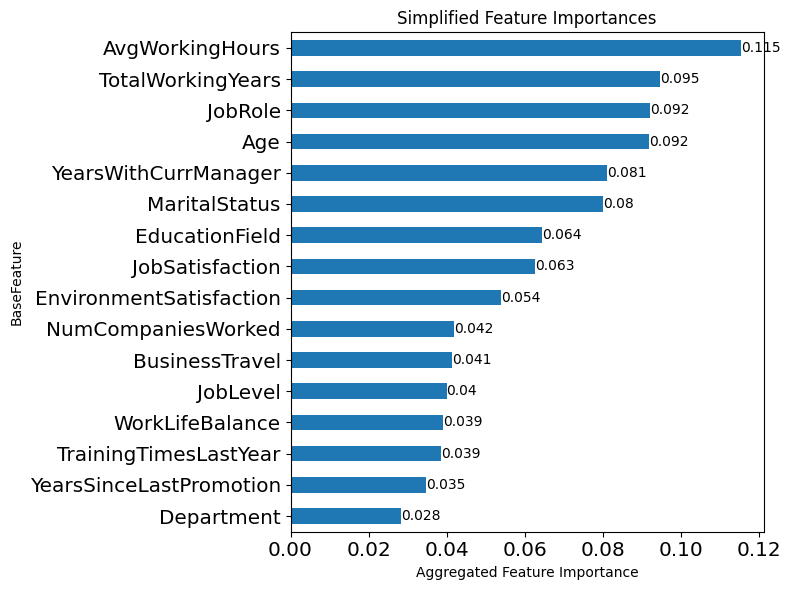

In [ ]:
# Feature Importance
importances = classifier.feature_importances_
feature_names = x_train.columns

# Feature Importance into dataframe
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Extract base feature name
feat_df['BaseFeature'] = feat_df['Feature'].str.extract(r'^([^_]+)')
grouped_feat = feat_df.groupby('BaseFeature')['Importance'].sum().sort_values(ascending=False)

# Sort by its importances' value
print(grouped_feat)

# Plot grouped importances
plt.figure(figsize=(8, 6))
grouped_feat.plot(kind='barh')
plt.xlabel('Aggregated Feature Importance')
plt.title('Simplified Feature Importances')
# Annotation
for i, value in enumerate(grouped_feat):
  plt.text(value, i, str(round(value, 3)), ha='left', va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Simplify encoded features

base_features = x_train.columns.str.split('_').str[0]

from collections import defaultdict
grouped_columns = defaultdict(list)

for col, base in zip(x_train.columns, base_features):
    grouped_columns[base].append(col)

simplified_x_train = pd.DataFrame(index=x_train.index)
simplified_x_test = pd.DataFrame(index=x_test.index)

for base, cols in grouped_columns.items():
    simplified_x_train[base] = x_train[cols].max(axis=1)
    simplified_x_test[base] = x_test[cols].max(axis=1)

simplified_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661 entries, 4098 to 194
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      661 non-null    float64
 1   NumCompaniesWorked       661 non-null    float64
 2   TotalWorkingYears        661 non-null    float64
 3   TrainingTimesLastYear    661 non-null    float64
 4   YearsSinceLastPromotion  661 non-null    float64
 5   YearsWithCurrManager     661 non-null    float64
 6   AvgWorkingHours          661 non-null    float64
 7   BusinessTravel           661 non-null    float64
 8   JobLevel                 661 non-null    float64
 9   EnvironmentSatisfaction  661 non-null    float64
 10  JobSatisfaction          661 non-null    float64
 11  WorkLifeBalance          661 non-null    float64
 12  Department               661 non-null    float64
 13  EducationField           661 non-null    float64
 14  JobRole                  661

## Model's Explainability

In [ ]:
import shap

explainer = shap.Explainer(classifier)
shap_values = explainer(x_test)

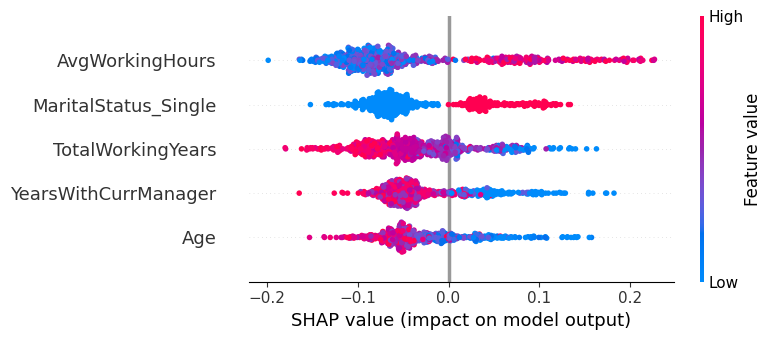

In [ ]:
shap.summary_plot(shap_values[:, :, 1], max_display=5)

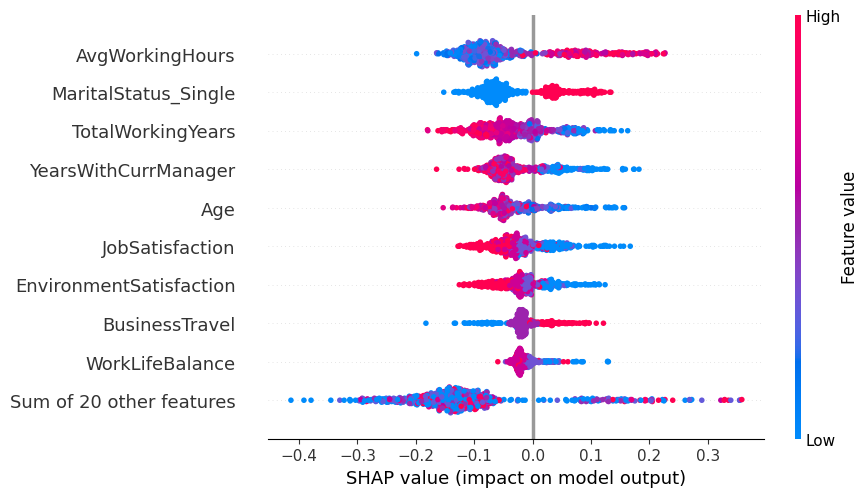

In [ ]:
shap.plots.beeswarm(shap_values[:, :, 1])

## Model's Fairness

In [ ]:
# model fairness analysis
!pip install fairlearn
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference

In [ ]:
x_train_2 = x_train.copy()
x_test_2 = x_test.copy()
y_train_2 = y_train.copy()
y_test_2 = y_test.copy()

In [ ]:
x_train_2['y_true'] = y_train_2
x_train_2['y_pred'] = classifier.predict(x_train)
x_test_2['y_true'] = y_test_2
x_test_2['y_pred'] = classifier.predict(x_test)

In [ ]:
# grouped confusion matrix
def grouped_confusion_matrix(df, group_col):
    for group_name, group_df in df.groupby(group_col):
        print(f"Confusion matrix for group: {group_name}\n")
        print(confusion_matrix(group_df['y_true'], group_df['y_pred']))
        print("="*60)

# Usage:
grouped_confusion_matrix(x_test_2, 'MaritalStatus_Single')

Confusion matrix for group: 0.0

[[398   0]
 [  4  53]]
Confusion matrix for group: 1.0

[[146   5]
 [  4  51]]


In [ ]:
# x_train_2 = x_train.copy()
classifier_2 = classifier

EducationField = [ 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree']
MaritalStatus = ['MaritalStatus_Married', 'MaritalStatus_Single']
Department = ['Department_Research & Development', 'Department_Sales']

x_test_2['EducationField'] = x_test_2[EducationField].idxmax(axis=1)
x_test_2['EducationField'] = x_test_2['EducationField'].str.replace('EducationField_', '').astype('category')
x_test_2['MaritalStatus'] = x_test_2[MaritalStatus].idxmax(axis=1)
x_test_2['MaritalStatus'] = x_test_2['MaritalStatus'].str.replace('MaritalStatus_', '').astype('category')
x_test_2['Department'] = x_test_2[Department].idxmax(axis=1)
x_test_2['Department'] = x_test_2['Department'].str.replace('Department_', '').astype('category')


x_train_2['EducationField'] = x_train_2[EducationField].idxmax(axis=1)
x_train_2['EducationField'] = x_train_2['EducationField'].str.replace('EducationField_', '').	astype('category')
x_train_2['MaritalStatus'] = x_train_2[MaritalStatus].idxmax(axis=1)
x_train_2['MaritalStatus'] = x_train_2['MaritalStatus'].str.replace('MaritalStatus_', '').astype('category')
x_train_2['Department'] = x_train_2[Department].idxmax(axis=1)
x_train_2['Department'] = x_train_2['Department'].str.replace('Department_', '').astype('category')

x_train_2['Sensitivites'] = (
	x_train_2['MaritalStatus'].astype(str) + "__" +
	x_train_2['EducationField'].astype(str) + "__" +
	x_train_2['Department'].astype(str)
)

x_test_2['Sensitivites'] = (
	x_test_2['MaritalStatus'].astype(str) + "__" +
	x_test_2['EducationField'].astype(str) + "__" +
	x_test_2['Department'].astype(str)
)


In [ ]:
from sklearn.metrics import precision_score
from fairlearn.metrics import MetricFrame
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

y_pred = classifier_2.predict(x_test)

mf = MetricFrame(
  metrics=precision_score,
  y_true=y_test,
  y_pred=y_pred,
  sensitive_features=x_test_2['MaritalStatus']
)
print(mf.by_group)
print(50*'-')

mf = MetricFrame(
  metrics=precision_score,
  y_true=y_test,
  y_pred=y_pred,
  sensitive_features=x_test_2['EducationField']
)
print(mf.by_group)
print(50*'-')

mf = MetricFrame(
  metrics=selection_rate,
  y_true=y_test,
  y_pred=y_pred,
  sensitive_features=x_test_2['Department']
)
print(mf.by_group)

MaritalStatus
Married    1.000000
Single     0.910714
Name: precision_score, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.960784
Marketing           0.900000
Medical             0.942857
Other               1.000000
Technical Degree    1.000000
Name: precision_score, dtype: float64
--------------------------------------------------
Department
Research & Development    0.169197
Sales                     0.155000
Name: selection_rate, dtype: float64


### DemographicParity

#### by MaritalStatus

In [ ]:
classifier_2 = classifier
mitigator_ms_dp = ExponentiatedGradient(
  estimator=classifier_2,
  constraints=DemographicParity()
)

mitigator_ms_dp.fit(x_train, y_train, sensitive_features=x_train_2['MaritalStatus'])

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7af2c3700d10>,
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       max_features='log2'),
                      nu=np.float64(0.0))

In [ ]:
y_pred_mitigated = mitigator_ms_dp.predict(x_test)

In [ ]:
mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['MaritalStatus']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['EducationField']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['Department']
)

print(mf.by_group)

MaritalStatus
Married    1.000000
Single     0.925926
Name: precision_score, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.945946
Marketing           1.000000
Medical             1.000000
Other               1.000000
Technical Degree    1.000000
Name: precision_score, dtype: float64
--------------------------------------------------
Department
Research & Development    0.119306
Sales                     0.125000
Name: selection_rate, dtype: float64


#### by EducationField

In [ ]:
classifier_2 = classifier
mitigator_ef_dp = ExponentiatedGradient(
  estimator=classifier_2,
  constraints=DemographicParity()
)

mitigator_ef_dp.fit(x_train, y_train, sensitive_features=x_train_2['EducationField'])

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7af27d1696d0>,
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       max_features='log2'),
                      nu=np.float64(0.0))

In [ ]:
y_pred_mitigated = mitigator_ef_dp.predict(x_test)

In [ ]:
mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['MaritalStatus']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['EducationField']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['Department']
)

print(mf.by_group)

MaritalStatus
Married    0.868852
Single     0.836066
Name: precision_score, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.980000
Marketing           0.900000
Medical             0.942857
Other               0.636364
Technical Degree    0.375000
Name: precision_score, dtype: float64
--------------------------------------------------
Department
Research & Development    0.193059
Sales                     0.165000
Name: selection_rate, dtype: float64


#### by Department

In [ ]:
classifier_2 = classifier
mitigator_d_dp = ExponentiatedGradient(
  estimator=classifier_2,
  constraints=DemographicParity()
)

mitigator_d_dp.fit(x_train, y_train, sensitive_features=x_train_2['Department'])

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x7af2c1218b50>,
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       max_features='log2'),
                      nu=np.float64(0.0))

In [ ]:
y_pred_mitigated = mitigator_d_dp.predict(x_test)

In [ ]:
mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['MaritalStatus']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['EducationField']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['Department']
)

print(mf.by_group)

MaritalStatus
Married    0.898305
Single     0.862069
Name: precision_score, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.857143
Marketing           0.750000
Medical             0.942857
Other               0.875000
Technical Degree    1.000000
Name: precision_score, dtype: float64
--------------------------------------------------
Department
Research & Development    0.171367
Sales                     0.190000
Name: selection_rate, dtype: float64


### EqualizedOdds

#### by MaritalStatus

In [ ]:
classifier_2 = classifier
mitigator_ms_eo = ExponentiatedGradient(
  estimator=classifier_2,
  constraints=EqualizedOdds()
)

mitigator_ms_eo.fit(x_train, y_train, sensitive_features=x_train_2['MaritalStatus'])

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7af27b890050>,
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       max_features='log2'),
                      nu=np.float64(0.0))

In [ ]:
y_pred_mitigated = mitigator_ms_eo.predict(x_test)

In [ ]:
mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['MaritalStatus']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['EducationField']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['Department']
)

print(mf.by_group)

MaritalStatus
Married    1.000000
Single     0.924528
Name: precision_score, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.958333
Marketing           1.000000
Medical             0.942857
Other               1.000000
Technical Degree    1.000000
Name: precision_score, dtype: float64
--------------------------------------------------
Department
Research & Development    0.16269
Sales                     0.15000
Name: selection_rate, dtype: float64


#### by EducationField

In [ ]:
classifier_2 = classifier
mitigator_ef_eo = ExponentiatedGradient(
  estimator=classifier_2,
  constraints=EqualizedOdds()
)

mitigator_ef_eo.fit(x_train, y_train, sensitive_features=x_train_2['EducationField'])

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7af2c386e790>,
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       max_features='log2'),
                      nu=np.float64(0.0))

In [ ]:
y_pred_mitigated = mitigator_ef_eo.predict(x_test)

In [ ]:
mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['MaritalStatus']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['EducationField']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['Department']
)

print(mf.by_group)

MaritalStatus
Married    1.000000
Single     0.925926
Name: precision_score, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.959184
Marketing           1.000000
Medical             0.942857
Other               1.000000
Technical Degree    1.000000
Name: precision_score, dtype: float64
--------------------------------------------------
Department
Research & Development    0.164859
Sales                     0.150000
Name: selection_rate, dtype: float64


#### by Department

In [ ]:
classifier_2 = classifier
mitigator_d_eo = ExponentiatedGradient(
  estimator=classifier_2,
  constraints=EqualizedOdds()
)

mitigator_d_eo.fit(x_train, y_train, sensitive_features=x_train_2['Department'])

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.EqualizedOdds object at 0x7af2a647f410>,
                      estimator=RandomForestClassifier(bootstrap=False,
                                                       max_depth=20,
                                                       max_features='log2'),
                      nu=np.float64(0.0))

In [ ]:
y_pred_mitigated = mitigator_d_eo.predict(x_test)

In [ ]:
mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['MaritalStatus']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=precision_score,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['EducationField']
)

print(mf.by_group)
print(50*'-')

mf = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_mitigated,
    sensitive_features=x_test_2['Department']
)

print(mf.by_group)

MaritalStatus
Married    1.000000
Single     0.910714
Name: precision_score, dtype: float64
--------------------------------------------------
EducationField
Life Sciences       0.960784
Marketing           0.900000
Medical             0.942857
Other               1.000000
Technical Degree    1.000000
Name: precision_score, dtype: float64
--------------------------------------------------
Department
Research & Development    0.169197
Sales                     0.155000
Name: selection_rate, dtype: float64


## Mitigated Model

In [ ]:
mitigated_model = mitigator_ms_dp

### Migitated Model Evaluation

In [ ]:
# confusion matrix
print(confusion_matrix(y_test, mitigated_model.predict(x_test)))

[[546   3]
 [ 29  83]]


In [ ]:
# confusion matrix
print(confusion_matrix(y_test, classifier.predict(x_test)))

[[544   5]
 [  8 104]]


# Model Export

In [ ]:
# Export the model
import joblib

joblib.dump(classifier, 'classifier_model.pkl')

['classifier_model.pkl']

# Business Recommendation

In [ ]:
grouped_feat.head(5)

,Importance
BaseFeature,
AvgWorkingHours,0.115441
TotalWorkingYears,0.094606
JobRole,0.092102
Age,0.091919
YearsWithCurrManager,0.081038


## AvgWorkingHours - Employee Working Hours

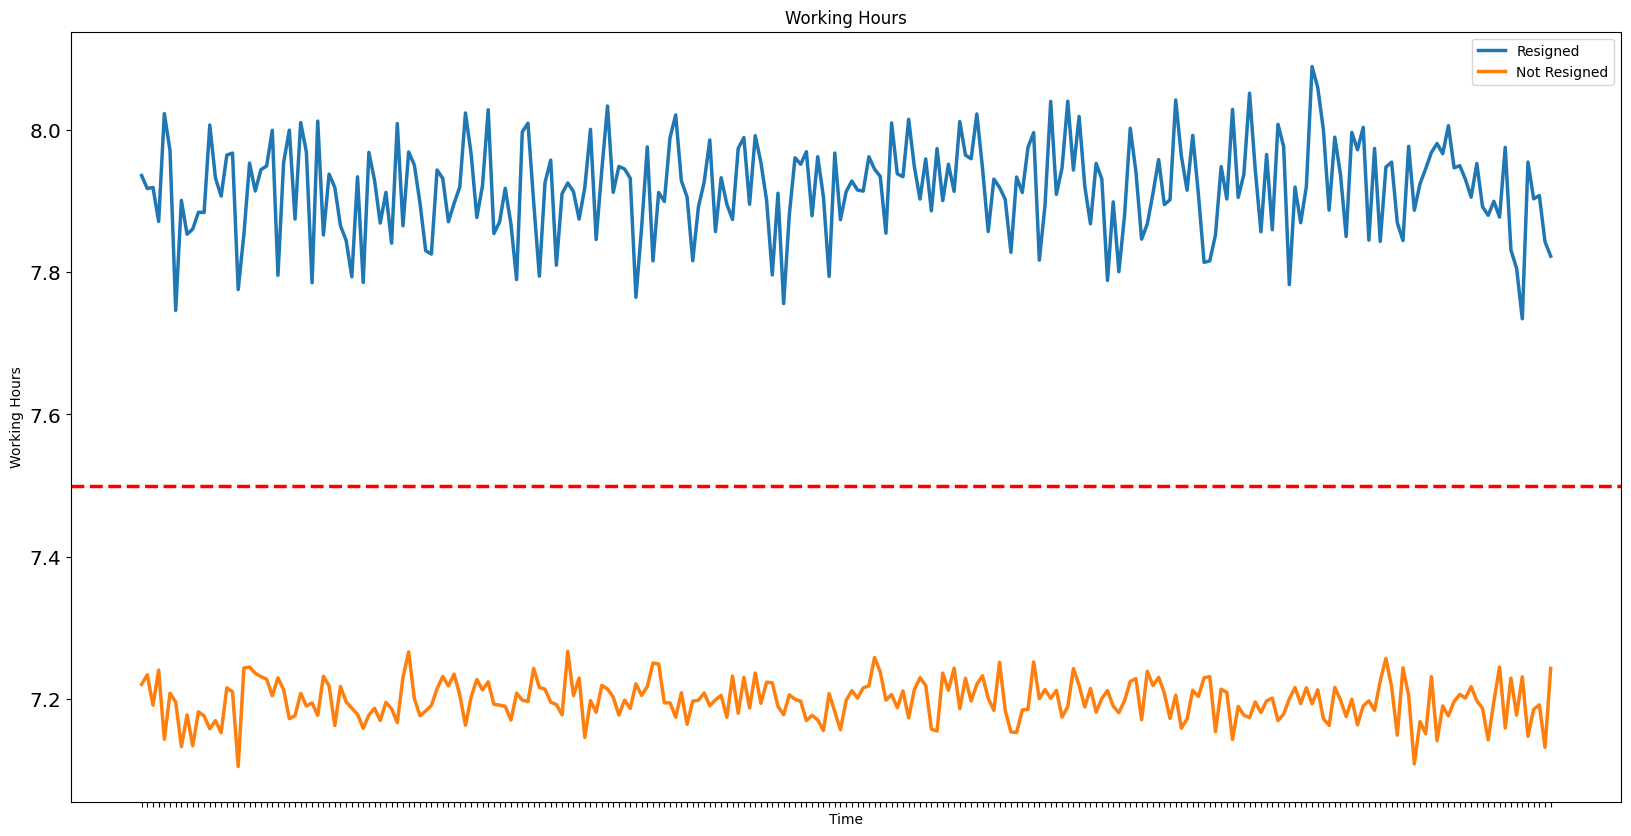

In [ ]:
# Data Visualization
plt.figure(figsize=(20, 10))
plt.plot(df_working_hours_resigned.index, df_working_hours_resigned['mean'], label='Resigned')
plt.plot(df_working_hours_not_resigned.index, df_working_hours_not_resigned['mean'], label='Not Resigned')
plt.xlabel('Time')
plt.ylabel('Working Hours')
plt.title('Working Hours')
# Add Constant Line at 7.5
plt.axhline(y=7.5, color='r', linestyle='--')
plt.xticks(visible=False)
plt.legend()
plt.show()

## TotalWorkingYears: Employee's Total Working Years or Experience

In [ ]:
df.groupby('Attrition')['TotalWorkingYears'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,3692.0,11.860780,7.762536,0.0,6.0,10.0,16.0,38.0
Yes,709.0,8.255289,7.164018,0.0,3.0,7.0,10.0,40.0


## JobRole: Employee's Role

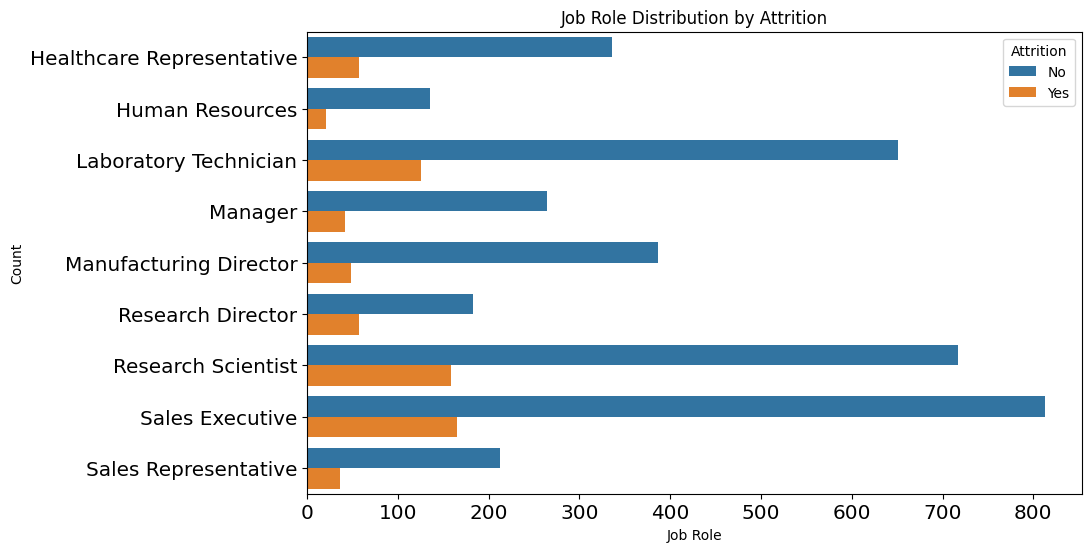

In [ ]:
# grouped countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Job Role Distribution by Attrition')
# plt.xticks(rotation=45)
plt.show()

## Age: Employee's Age

In [ ]:
# employee group
df_age = df['Age']

# Age Group
df['AgeGroup'] = pd.cut(
  df['Age'],
  bins=[-float('inf'), 20, 30, 40, 50, 60, float('inf')],
  labels=['Under 20', '20s', '30s', '40s', '50s', 'Over 60'], right=False
)

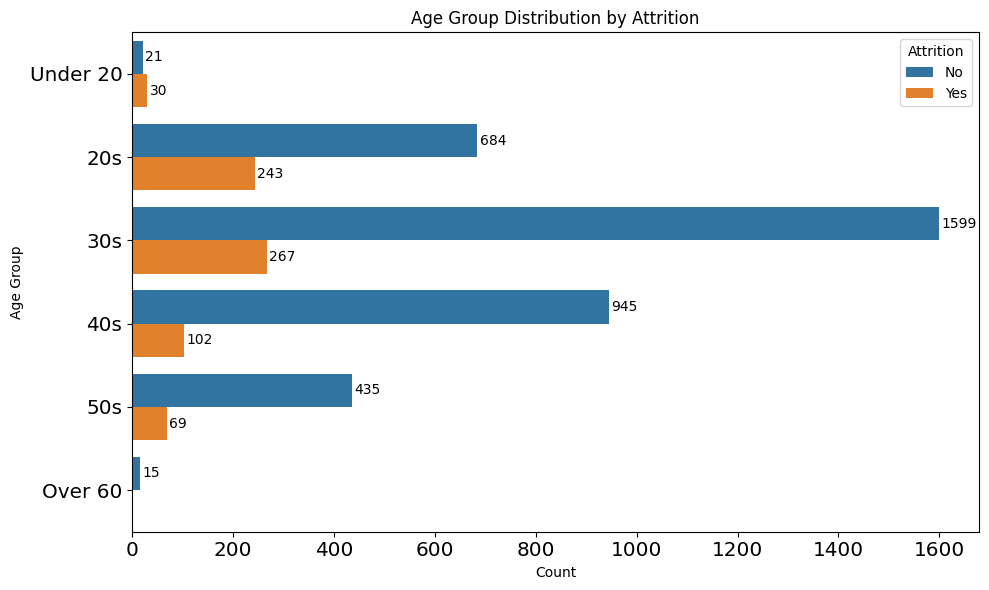

In [ ]:
# Plot setup
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='AgeGroup', hue='Attrition')

# Add annotations
for p in ax.patches:
  count = int(p.get_width())
  if count > 0:
    y = p.get_y() + p.get_height() / 2
    ax.text(p.get_width() + 5, y, str(count), va='center', fontsize=10)

plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Age Group Distribution by Attrition')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

## YearsWithCurrManager: Employees' Year Spent with Their Current Manager

In [ ]:
df['YearsWithCurrManager'].describe()

,YearsWithCurrManager
count,4410.000000
mean,4.123129
std,3.567327
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,17.000000


In [ ]:
bins = [0, 1, 3, 5, 10, df['YearsWithCurrManager'].max()]
labels = ['<1 year', '1–3 years', '3–5 years', '5–10 years', '10+ years']
df['YearsWithCurrManagerSegment'] = pd.cut(df['YearsWithCurrManager'], bins=bins, labels=labels)

<Figure size 1000x600 with 0 Axes>

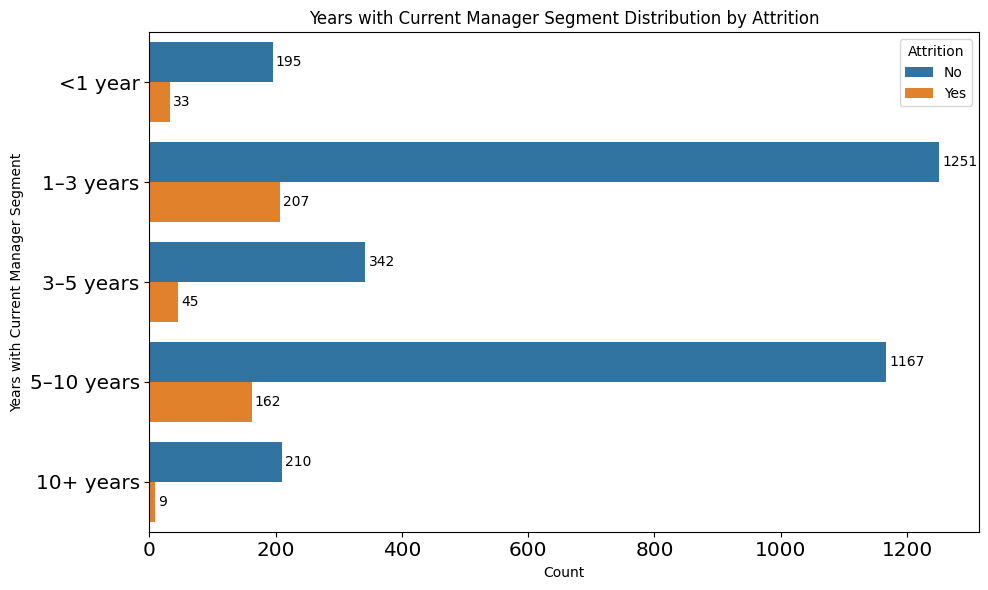

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot setup
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='YearsWithCurrManagerSegment', hue='Attrition')

# Add annotations
for p in ax.patches:
  count = int(p.get_width())
  if count > 0:
    y = p.get_y() + p.get_height() / 2
    ax.text(p.get_width() + 5, y, str(count), va='center', fontsize=10)

plt.xlabel('Count')
plt.ylabel('Years with Current Manager Segment')
plt.title('Years with Current Manager Segment Distribution by Attrition')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# Model Impact for Business Metrics

In [ ]:
# data combine
feature_business = pd.concat([x_train, x_test, x_val], axis=0)
target_business = pd.concat([y_train, y_test, y_val], axis=0)

## Training Cost

In [ ]:
training_cost = 1000

In [ ]:
# confussion matrix
print(confusion_matrix(y_test, classifier.predict(x_test)))

[[544   5]
 [  8 104]]


In [ ]:
len(df[(df['TrainingTimesLastYear'] != 0) & (df['Attrition'] == 'Yes')])

681

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,3699
Yes,711


In [ ]:
((544+8)/711) * training_cost

776.3713080168776

## Attrition Rate

In [ ]:
df_prediction = pd.read_csv('/content/hasil_prediksi (1).csv')

In [ ]:
df_prediction

,EmployeeID,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,Department,EducationField,JobLevel,JobRole,MaritalStatus,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Prediction,Probability
0,1,51,1.0,1.0,6,0,0,6.552490,Travel_Rarely,Sales,Life Sciences,1,Healthcare Representative,Married,3.0,4.0,2.0,Stay,0.170000
1,2,31,0.0,6.0,3,1,4,6.979693,Travel_Frequently,Research & Development,Life Sciences,1,Research Scientist,Single,3.0,2.0,4.0,Leave,0.539206
2,3,32,1.0,5.0,2,0,3,6.500766,Travel_Frequently,Research & Development,Other,4,Sales Executive,Married,2.0,2.0,1.0,Stay,0.050000
3,4,38,3.0,13.0,5,7,5,6.478161,Non-Travel,Research & Development,Life Sciences,3,Human Resources,Married,4.0,4.0,3.0,Stay,0.000000
4,5,32,4.0,9.0,2,0,4,7.515326,Travel_Rarely,Research & Development,Medical,1,Sales Executive,Single,4.0,1.0,3.0,Stay,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,3.0,10.0,5,0,2,7.935632,Travel_Rarely,Research & Development,Medical,1,Research Scientist,Single,4.0,1.0,3.0,Stay,0.160000
4406,4407,29,2.0,10.0,2,0,2,5.629119,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,Divorced,4.0,4.0,3.0,Stay,0.020390
4407,4408,25,0.0,5.0,4,1,2,6.821456,Travel_Rarely,Research & Development,Life Sciences,2,Sales Executive,Married,1.0,3.0,3.0,Stay,0.323695
4408,4409,42,0.0,10.0,2,7,8,8.766284,Travel_Rarely,Sales,Medical,1,Laboratory Technician,Divorced,4.0,1.0,3.0,Stay,0.280000


In [ ]:
# merge dataframe on EmployeeID
pred_prob = ['Prediction', 'Probability', 'EmployeeID']
df_pred_proba = df_prediction[pred_prob]
df_after_model = pd.merge(df, df_pred_proba, on='EmployeeID')

In [ ]:
df_after_model['Attrition'].value_counts(normalize = True)

,proportion
Attrition,
No,0.838776
Yes,0.161224


In [ ]:
df_after_model['Prediction'].value_counts()

,count
Prediction,
Stay,3719
Leave,691


In [ ]:
df_after_model['Attrition'].value_counts()

,count
Attrition,
No,3699
Yes,711


In [ ]:
df_after_model.groupby('JobRole')['Attrition'].value_counts()

JobRole                    Attrition
Healthcare Representative  No           336
                           Yes           57
Human Resources            No           135
                           Yes           21
Laboratory Technician      No           651
                           Yes          126
Manager                    No           264
                           Yes           42
Manufacturing Director     No           387
                           Yes           48
Research Director          No           183
                           Yes           57
Research Scientist         No           717
                           Yes          159
Sales Executive            No           813
                           Yes          165
Sales Representative       No           213
                           Yes           36
Name: count, dtype: int64

# Pipeline

## Data Combiner

In [ ]:
import pandas as pd

def data_combiner_pipeline(datasets):
	'''
	Takes a dictionary of pandas DataFrames.
	Finds common connector columns between datasets,
	and merges all datasets stepwise using those connectors.
	'''
	def find_connectors(datasets):
		connector = []
		dataset_keys = list(datasets.keys())
		for i in range(1, len(dataset_keys)):
			df_current = datasets[dataset_keys[i]]
			df_previous = datasets[dataset_keys[i - 1]]
			common_columns = set(df_current.columns).intersection(df_previous.columns)
			connector.extend([col for col in common_columns if col not in connector])
		return connector

	def merge_datasets(datasets):
		dataset_keys = list(datasets.keys())
		if not dataset_keys:
			return None  # no data to merge

		merged_df = datasets[dataset_keys[0]]

		for i in range(1, len(dataset_keys)):
			df_next = datasets[dataset_keys[i]]
			connectors = set(merged_df.columns).intersection(df_next.columns)
			if not connectors:
				raise ValueError(f"No common columns to merge dataset {dataset_keys[i-1]} and {dataset_keys[i]}")
			merged_df = pd.merge(merged_df, df_next, on=list(connectors), how='inner')

		return merged_df

	# (optional) find connectors
	connectors = find_connectors(datasets)
	print(f"Connectors found: {connectors}")

	# merge datasets
	merged_table = merge_datasets(datasets)

	return merged_table

## Features Grouper

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

def build_feature_grouping_pipeline(
	df,
	numeric_columns=None,
	exclude_columns=None,
	drop_single_value=True,
	feature_groups=None
):
	"""
	Automatically detects or applies global feature groups and builds a preprocessing pipeline.

	Parameters:
	- df: pandas DataFrame
	- numeric_columns: list of known numeric features (optional)
	- exclude_columns: list of columns to exclude (e.g., IDs)
	- drop_single_value: bool, whether to drop single-value columns
	- feature_groups: dict, pre-defined global feature groups (optional)

	Returns:
	- pipeline: scikit-learn Pipeline with grouped feature preprocessing
	- feature_groups: dict of global feature groupings
	"""
	if exclude_columns is None:
		exclude_columns = []

	if feature_groups is not None:
		numeric_columns = feature_groups.get('numeric', [])
		ordinal_cat_columns = feature_groups.get('ordinal', [])
		binary_columns = feature_groups.get('binary', [])
		ohe_columns = feature_groups.get('ohe', [])
		single_value_columns = feature_groups.get('single_value', [])

		if drop_single_value:
			df = df.drop(columns=[col for col in single_value_columns if col in df.columns])
	else:
		if numeric_columns is None:
			numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
			numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

		cat_columns = df.columns.difference(numeric_columns + exclude_columns)

		single_value_columns = [col for col in cat_columns if df[col].nunique(dropna=False) == 1]
		if drop_single_value:
			df = df.drop(columns=single_value_columns)
			cat_columns = cat_columns.difference(single_value_columns)

		ordinal_cat_columns = [
			col for col in cat_columns if np.issubdtype(df[col].dtype, np.number)
		]

		nominal_cat_columns = list(cat_columns.difference(ordinal_cat_columns))

		def is_binary(col):
			return df[col].nunique(dropna=False) == 2

		binary_columns = [col for col in nominal_cat_columns if is_binary(col)]
		ohe_columns = list(set(nominal_cat_columns) - set(binary_columns))

		feature_groups = {
			'numeric': numeric_columns,
			'ordinal': ordinal_cat_columns,
			'binary': binary_columns,
			'ohe': ohe_columns,
			'single_value': single_value_columns,
		}

	numeric_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='median')),
		('scaler', StandardScaler())
	])

	ordinal_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='most_frequent')),
		('encoder', OrdinalEncoder())
	])

	binary_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='most_frequent')),
		('encoder', OrdinalEncoder())
	])

	ohe_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='most_frequent')),
		('encoder', OneHotEncoder(handle_unknown='ignore'))
	])

	feature_imputer = ColumnTransformer(transformers=[
		('num', numeric_pipeline, numeric_columns),
		('ordinal_cat', ordinal_pipeline, ordinal_cat_columns),
		('binary_cat', binary_pipeline, binary_columns),
		('ohe_cat', ohe_pipeline, ohe_columns),
	], remainder='drop')

	return Pipeline([('Imputed Features:', feature_imputer)]), feature_groups

## Partial-Significance Based Features Selector

In [ ]:
'''
The Features Selection process will be based on A/B testing. <br>
Since the data are containing both categoric and numeric type data, each will goes through different method. <br>
The numeric features significance tests are using logistic regression, whil categoric features significance tests are using maximum likelihood.

This will be applied to each feature, and since it's A/B testing, here's the hypothesis: <br>
h0: the feature isn't significantly influenced the target. <br>
h1: the feature is significantly influenced the target.

The thereshold is alpha = 0.05, with decision making is take h1 if the p-value of each feature is less than alpha.

The output will show which features that influenced the target significantly. <br>
Those features that doesn't have significant influence will be eliminated, while those who does will be kept.
'''
class StatisticalFeatureSelector(BaseEstimator, TransformerMixin):
	def __init__(self, num_cols, cat_cols, target='attrition', p_threshold=0.05):
		self.num_cols = num_cols
		self.cat_cols = cat_cols
		self.target = target
		self.p_threshold = p_threshold
		self.significant_features = []

	def fit(self, x, y):
		global significant_num, significant_cat, significants

		df = x.copy()
		df[self.target] = y.map({'No': 0, 'Yes': 1}).astype(int)

		# Numeric feature p-values
		formula = self.target + ' ~ ' + ' + '.join(self.num_cols)
		base_model = smf.logit(formula, data=df).fit(disp=False)
		numeric_pvalues = base_model.pvalues.drop('Intercept')

		significant_num = numeric_pvalues[numeric_pvalues < self.p_threshold].index.tolist()

		# Categorical feature p-values
		significant_cat = []
		for var in self.cat_cols:
			formula_full = formula + f' + C({var})'
			try:
				model_full = smf.logit(formula_full, data=df).fit(disp=False)
				model_reduced = base_model
				lr_stat = 2 * (model_full.llf - model_reduced.llf)
				df_diff = model_full.df_model - model_reduced.df_model
				p_val = chi2.sf(lr_stat, df_diff)
				if p_val < self.p_threshold:
					significant_cat.append(var)
			except:
				pass

		significants = significant_num + significant_cat
		self.significant_features = significants
		return self

	def transform(self, x):
		return x[self.significant_features]

## Advanced Preprocessor

### Numeric Preprocessor

In [ ]:
'''
Normalize and rescale numeric features
'''
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Custom log1p transformer
class LogTransformer(BaseEstimator, TransformerMixin):
	def fit(self, x, y=None):
		return self

	def transform(self, x):
		return np.log1p(x)

# Numeric transformation pipeline
num_pipeline = Pipeline([
	('log', LogTransformer()),
	('scaler', RobustScaler())
])

# Pipeline
num_preprocessor = ColumnTransformer([
	('num', num_pipeline, final_num_columns)
])

### Ordinal Encoder

In [ ]:
# Declare the order
ordinal_categories = [
	sorted(x_train[col].dropna().unique().tolist())

 for col in final_ordinal_cat_columns
]

# Pipeline
ordinal_encode = Pipeline([
	('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))
])

### One Hot Encoder

In [ ]:
# pipeline
ohe_encode = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

### Combined Preprocessor

In [ ]:
preprocessor = ColumnTransformer([
	('num', num_preprocessor, final_num_columns),
	('ordinal', ordinal_encode, final_ordinal_cat_columns),
	('ohe', ohe_encode, final_ohe_columns)
])

## Deplyment Pipeline

In [ ]:
x_dummy_test = pd.read_csv('/content/x_dummy_test.csv')
#x_dummy_train = pd.read_csv('/content/x_dummy_train.csv')

In [ ]:
df_input = pd.DataFrame()
num_columns = final_num_columns
ordinal_cat_columns = final_ordinal_cat_columns
ohe_columns = final_ohe_columns

cols_list = x_dummy_test.columns.to_list()

In [ ]:
df_input = all_df[feature_list]

In [ ]:
final_ordinal_cat_columns

['BusinessTravel',
 'JobLevel',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [ ]:
import joblib
# Custom Log Transformer
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None): return self
    def transform(self, x): return np.log1p(x)

# Pipeline numerik
num_pipeline = Pipeline([
    ('log', LogTransformer()),
    ('scaler', RobustScaler())
])

# Encoder ordinal dengan urutan kategori otomatis dari data
ordinal_encoder = OrdinalEncoder(categories=[
    sorted(df_input[col].dropna().unique().tolist()) for col in ordinal_cat_columns
])

# Preprocessor gabungan
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_columns),
    ('ordinal', ordinal_encoder, ordinal_cat_columns),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ohe_columns)
])

In [ ]:
joblib.dump(preprocessor, "preprocessor.pkl")

In [ ]:
# ================================
# Imports
# ================================
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import statsmodels.formula.api as smf
from scipy.stats import chi2

# ================================
# Data Combiner Pipeline
# ================================
def data_combiner_pipeline(datasets):
	'''
	Merges a dictionary of DataFrames based on common columns.
	'''
	def find_connectors(datasets):
		connector = []
		dataset_keys = list(datasets.keys())
		for i in range(1, len(dataset_keys)):
			df_current = datasets[dataset_keys[i]]
			df_previous = datasets[dataset_keys[i - 1]]
			common_columns = set(df_current.columns).intersection(df_previous.columns)
			connector.extend([col for col in common_columns if col not in connector])
		return connector

	def merge_datasets(datasets):
		dataset_keys = list(datasets.keys())
		if not dataset_keys:
			return None
		merged_df = datasets[dataset_keys[0]]
		for i in range(1, len(dataset_keys)):
			df_next = datasets[dataset_keys[i]]
			connectors = set(merged_df.columns).intersection(df_next.columns)
			if not connectors:
				raise ValueError(f"No common columns to merge dataset {dataset_keys[i-1]} and {dataset_keys[i]}")
			merged_df = pd.merge(merged_df, df_next, on=list(connectors), how='inner')
		return merged_df

	connectors = find_connectors(datasets)
	print(f"Connectors found: {connectors}")
	merged_table = merge_datasets(datasets)
	return merged_table

# ================================
# Feature Grouping and Preprocessing
# ================================
def build_feature_grouping_pipeline(df, numeric_columns=None, exclude_columns=None, drop_single_value=True, feature_groups=None):
	'''
	Automatically detects feature types and creates preprocessing pipelines for each group.
	'''
	if exclude_columns is None:
		exclude_columns = []

	if feature_groups is not None:
		numeric_columns = feature_groups.get('numeric', [])
		ordinal_cat_columns = feature_groups.get('ordinal', [])
		binary_columns = feature_groups.get('binary', [])
		ohe_columns = feature_groups.get('ohe', [])
		single_value_columns = feature_groups.get('single_value', [])
		if drop_single_value:
			df = df.drop(columns=[col for col in single_value_columns if col in df.columns])
	else:
		if numeric_columns is None:
			numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
			numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

		cat_columns = df.columns.difference(numeric_columns + exclude_columns)
		single_value_columns = [col for col in cat_columns if df[col].nunique(dropna=False) == 1]
		if drop_single_value:
			df = df.drop(columns=single_value_columns)
			cat_columns = cat_columns.difference(single_value_columns)

		ordinal_cat_columns = [col for col in cat_columns if np.issubdtype(df[col].dtype, np.number)]
		nominal_cat_columns = list(cat_columns.difference(ordinal_cat_columns))

		def is_binary(col):
			return df[col].nunique(dropna=False) == 2

		binary_columns = [col for col in nominal_cat_columns if is_binary(col)]
		ohe_columns = list(set(nominal_cat_columns) - set(binary_columns))

		feature_groups = {
			'numeric': numeric_columns,
			'ordinal': ordinal_cat_columns,
			'binary': binary_columns,
			'ohe': ohe_columns,
			'single_value': single_value_columns
		}

	numeric_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='median')),
		('scaler', StandardScaler())
	])

	ordinal_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='most_frequent')),
		('encoder', OrdinalEncoder())
	])

	binary_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='most_frequent')),
		('encoder', OrdinalEncoder())
	])

	ohe_pipeline = Pipeline([
		('imputer', SimpleImputer(strategy='most_frequent')),
		('encoder', OneHotEncoder(handle_unknown='ignore'))
	])

	feature_imputer = ColumnTransformer(transformers=[
		('num', numeric_pipeline, numeric_columns),
		('ordinal_cat', ordinal_pipeline, ordinal_cat_columns),
		('binary_cat', binary_pipeline, binary_columns),
		('ohe_cat', ohe_pipeline, ohe_columns),
	], remainder='drop')

	return Pipeline([('feature_preprocessing', feature_imputer)]), feature_groups

# ================================
# Statistical Feature Selector
# ================================
class StatisticalFeatureSelector(BaseEstimator, TransformerMixin):
	'''
	Selects significant features based on p-values from logistic regression (numeric)
	and likelihood ratio tests (categorical).
	'''
	def __init__(self, num_cols, cat_cols, target='attrition', p_threshold=0.05):
		self.num_cols = num_cols
		self.cat_cols = cat_cols
		self.target = target
		self.p_threshold = p_threshold
		self.significant_features = []

	def fit(self, x, y):
		df = x.copy()
		df[self.target] = y.map({'No': 0, 'Yes': 1}).astype(int)

		formula = self.target + ' ~ ' + ' + '.join(self.num_cols)
		base_model = smf.logit(formula, data=df).fit(disp=False)
		numeric_pvalues = base_model.pvalues.drop('Intercept')
		significant_num = numeric_pvalues[numeric_pvalues < self.p_threshold].index.tolist()

		significant_cat = []
		for var in self.cat_cols:
			formula_full = formula + f' + C({var})'
			try:
				model_full = smf.logit(formula_full, data=df).fit(disp=False)
				lr_stat = 2 * (model_full.llf - base_model.llf)
				df_diff = model_full.df_model - base_model.df_model
				p_val = chi2.sf(lr_stat, df_diff)
				if p_val < self.p_threshold:
					significant_cat.append(var)
			except:
				pass

		self.significant_features = significant_num + significant_cat
		return self

	def transform(self, x):
		return x[self.significant_features]

# ================================
# Log + Robust Scaling Transformer
# ================================
class LogTransformer(BaseEstimator, TransformerMixin):
	def fit(self, x, y=None):
		return self

	def transform(self, x):
		return np.log1p(x)

def get_numeric_scaler_pipeline(final_num_columns):
	return ColumnTransformer([
		('num', Pipeline([
			('log', LogTransformer()),
			('scaler', RobustScaler())
		]), final_num_columns)
	])

# ================================
# Ordinal Encoder Pipeline
# ================================
def get_ordinal_encoder_pipeline(x_train, final_ordinal_cat_columns):
	ordinal_categories = [
		sorted(x_train[col].dropna().unique().tolist())
		for col in final_ordinal_cat_columns
	]
	return Pipeline([
		('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))
	])

# ================================
# One-Hot Encoder Pipeline
# ================================
def get_ohe_pipeline():
	return Pipeline([
		('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
	])

# ================================
# Target Encoding (manual)
# ================================
def encode_target(df, target_col='attrition'):
	'''
	Manually encode the target variable from 'No'/'Yes' to 0/1
	'''
	target = df[target_col].map({'No': 0, 'Yes': 1}).astype(int)
	return target


# Data n Model Import

In [ ]:
import joblib
x_train = pd.read_csv('/content/x_train.csv')
x_test = pd.read_csv('/content/x_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test.csv')
x_val = pd.read_csv('/content/x_val.csv')
y_val = pd.read_csv('/content/y_val.csv')

classifier = joblib.load('/content/tuned_classifier.pkl')

# Create Dummy Data

In [ ]:
feature_list = [
    "EmployeeID",
    "Age",
    "NumCompaniesWorked",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "AvgWorkingHours",
    "BusinessTravel",
    "Department",
    "EducationField",
    "JobLevel",
    "JobRole",
    "MaritalStatus",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance"
]


In [ ]:
all_df = pd.merge(df, df_employee_survey, on='EmployeeID', how='left')
all_df = pd.merge(all_df, df_manager_survey, on='EmployeeID', how='left')
all_df['AvgWorkingHours'] = df_working_hours['avg_working_hours'].astype(float)

In [ ]:
# make dummy data
y_dummy = all_df['Attrition']
x_dummy = all_df.drop(columns=['Attrition'])

x_dummy_train, x_dummy_test, y_dummy_train, y_dummy_test = train_test_split(x_dummy, y_dummy, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
x_dummy_test = x_dummy_test[feature_list]
x_dummy_train = x_dummy_train[feature_list]

NameError: name 'x_dummy_test' is not defined

In [ ]:
# dummy data export
x_dummy_train.to_csv('x_dummy_train.csv', index=False)
x_dummy_test.to_csv('x_dummy_test.csv', index=False)

In [ ]:
df_input = all_df[feature_list]

In [ ]:
# data export
df_input.to_csv('df_input.csv', index=False)